In [1]:
from trig_poly import TrigPoly
import matplotlib.pyplot as plt
import numpy as np
from test_data import jittered_supports, uniform_supports
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# set up a generic t-axis to use for plotting
N_TICKS = 1000
t = np.linspace(-0.5, 0.5, N_TICKS)

### Visualize dirichlet kernel for a few values of $f_c$

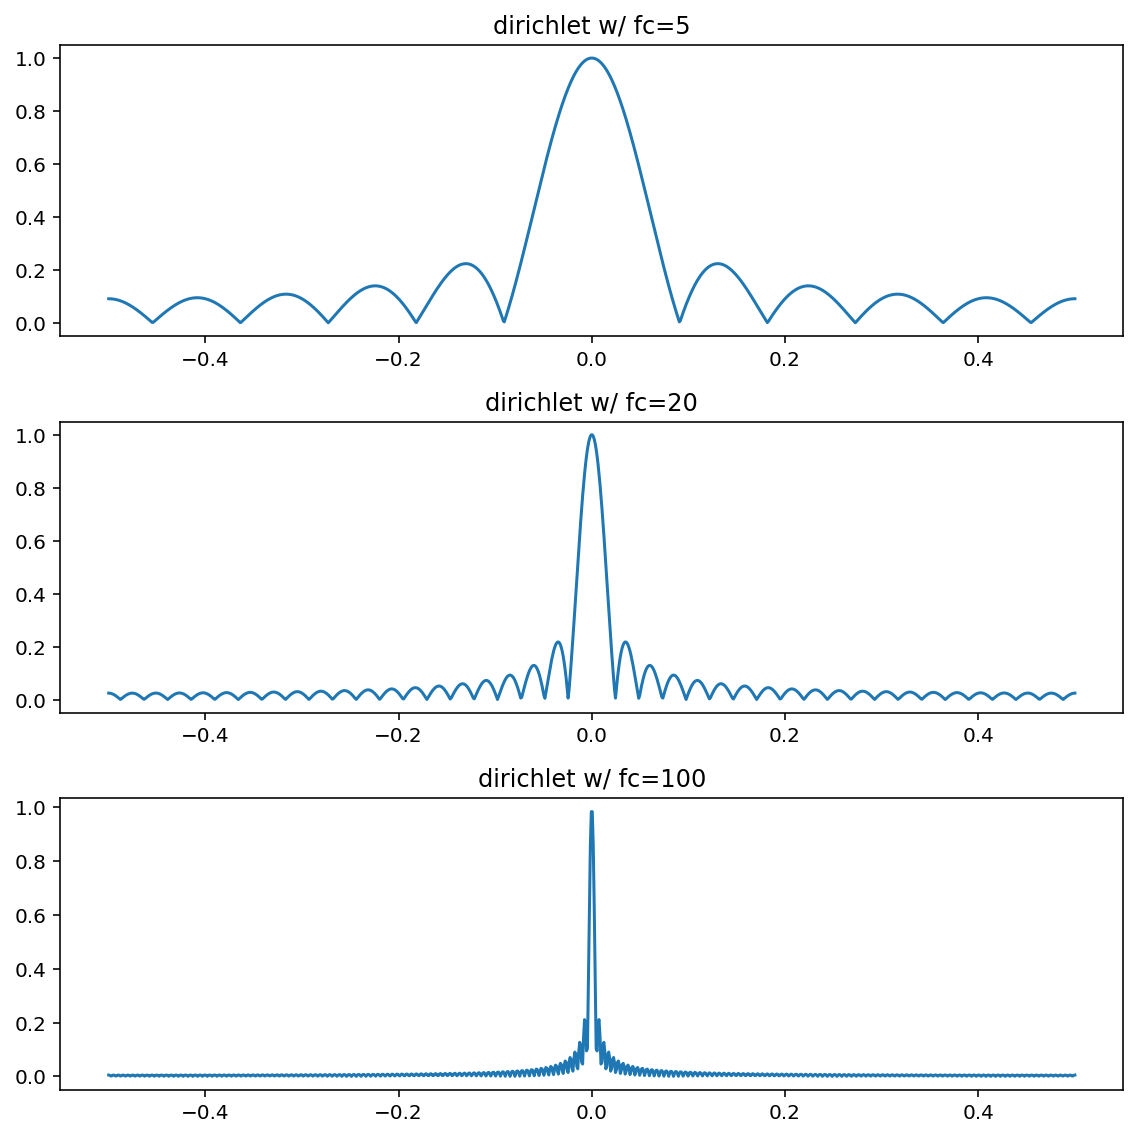

In [3]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
fig.set_tight_layout(True)
for i, fc in enumerate([5, 20, 100]):
    axs[i].plot(t, np.abs(TrigPoly.dirichlet(fc).eval(t)))
    axs[i].set_title(f"dirichlet w/ fc={fc}")

### Visualize multi-dirichlet kernel for a few values of $f_c$, with gammas=[0.5,0.5] (squared kernel)

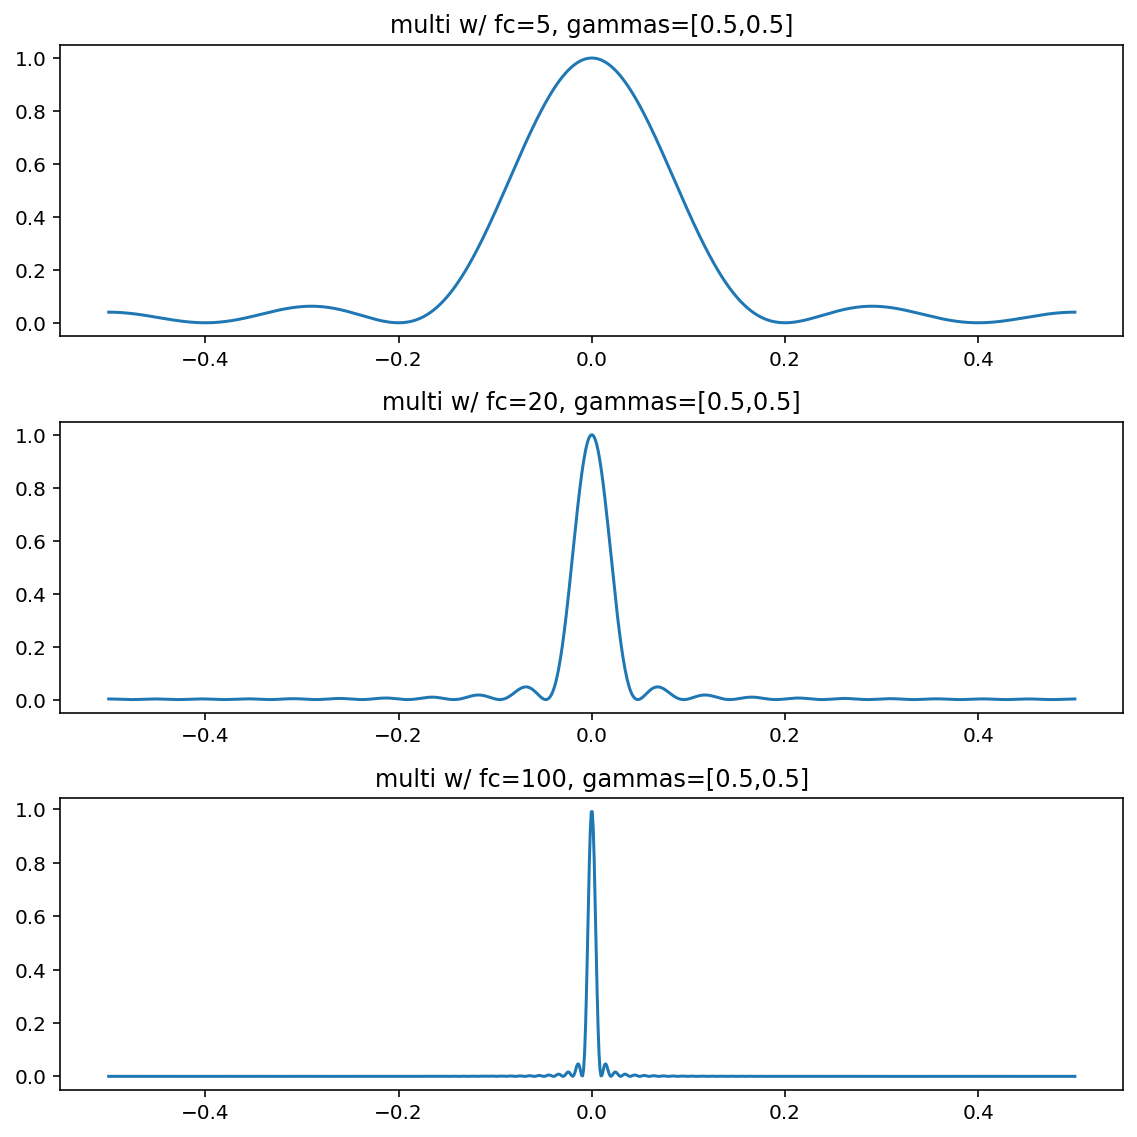

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
fig.set_tight_layout(True)
for i, fc in enumerate([5, 20, 100]):
    axs[i].plot(t, np.abs(TrigPoly.multi_dirichlet(fc, [0.5, 0.5]).eval(t)))
    axs[i].set_title(f"multi w/ fc={fc}, gammas=[0.5,0.5]")

### Experiment with pairs of gammas

In [5]:
GAMMA_1S = [10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1, 0.2, 0.3, 0.4, 0.5]
gammas = [(g, 1 - g) for g in GAMMA_1S]

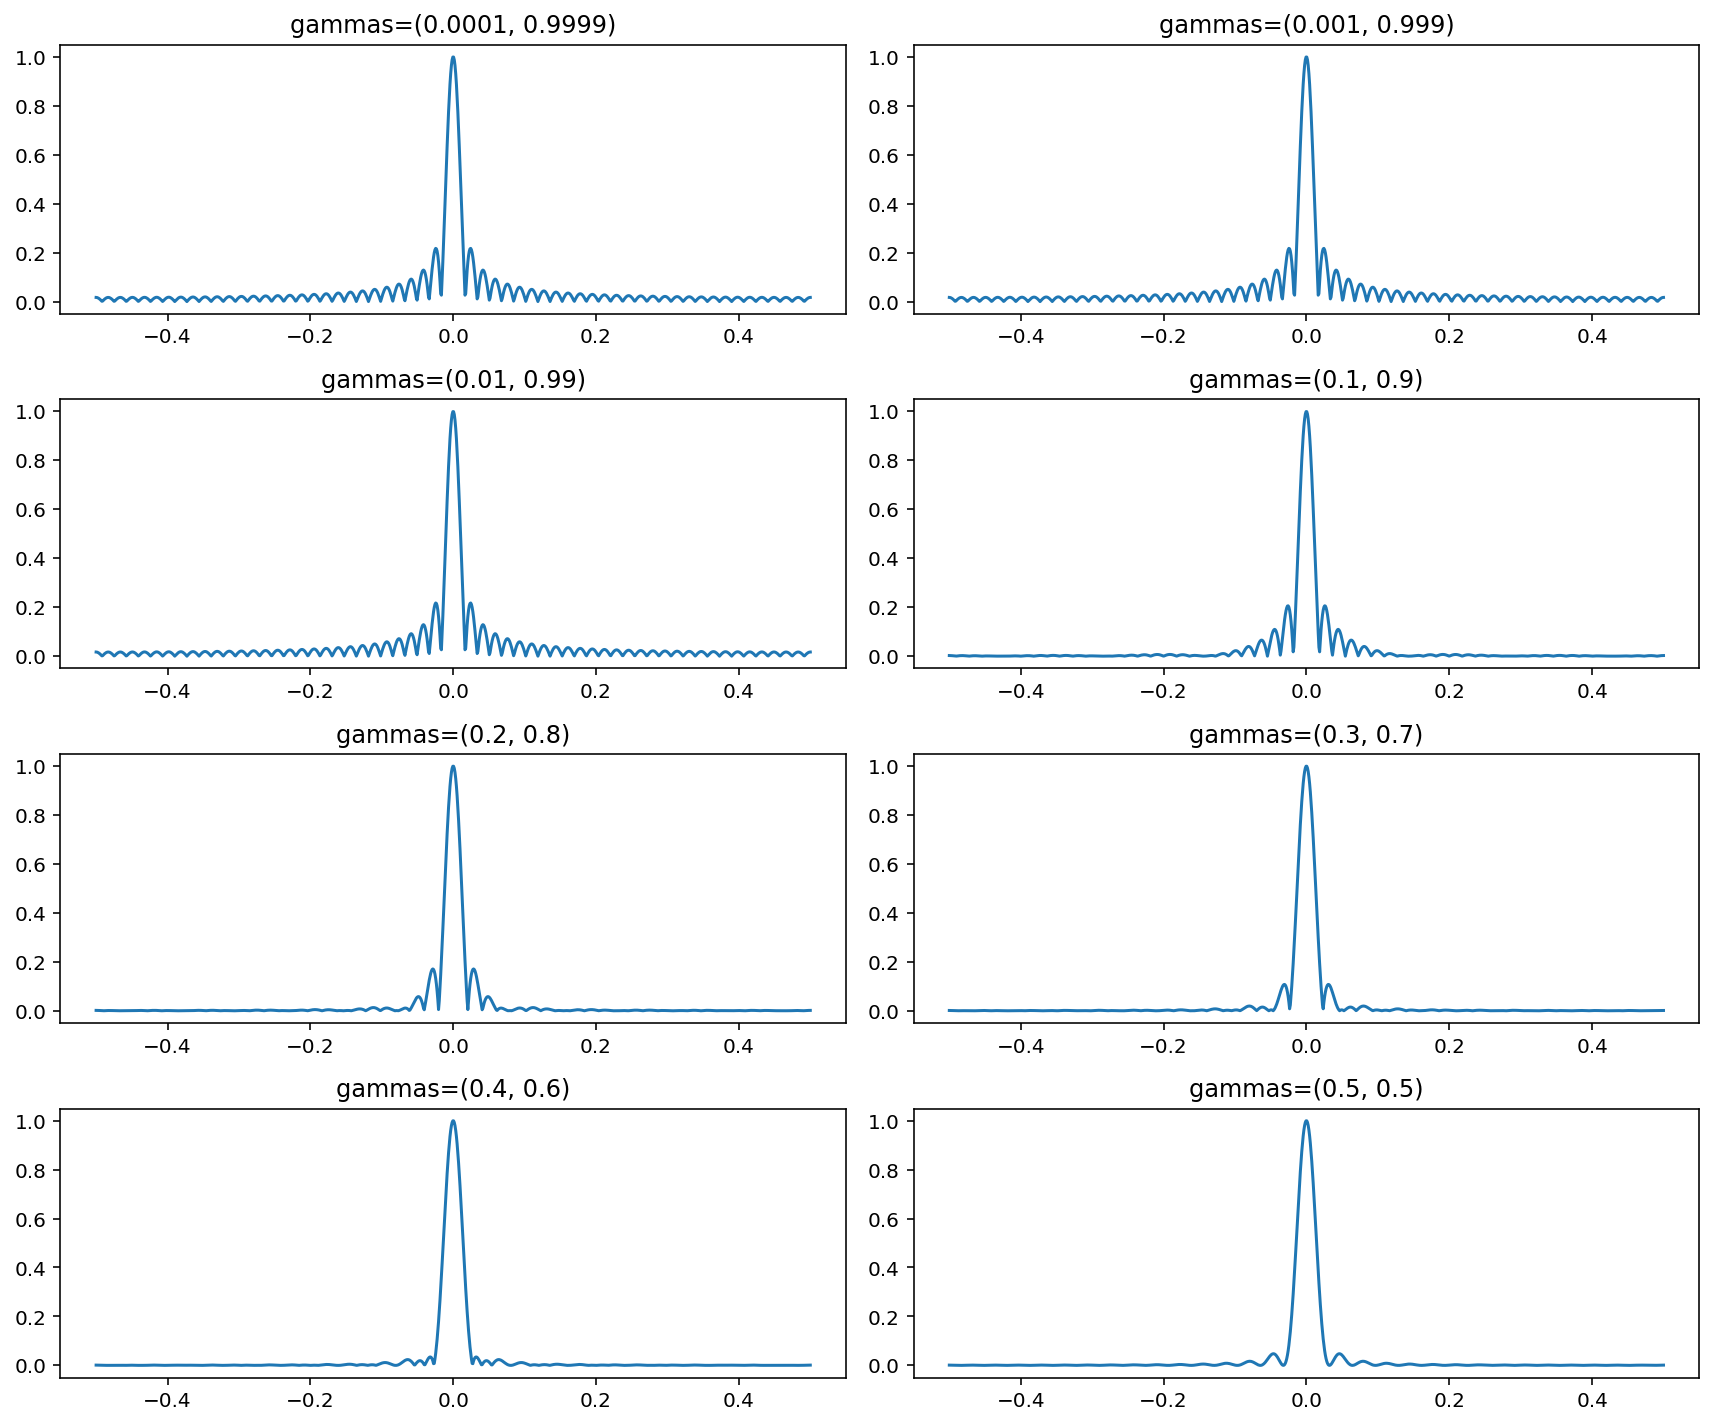

In [6]:
fig, axs = plt.subplots(4, 2, figsize=(12, 10))
fig.set_tight_layout(True)
for i in range(8):
    axs.flatten()[i].plot(t, np.abs(TrigPoly.multi_dirichlet(30, gammas[i]).eval(t)))
    axs.flatten()[i].set_title(f"gammas={gammas[i]}")

In [7]:
# from Kernel Matrix Analysis notebook
def kernel_matrix(kernel, support):
    shifted_supports = np.outer(np.ones(N), support) - np.outer(support, np.ones(N))
    return kernel.eval(shifted_supports).real

### Visualize kernel matrices for multidirichlet kernels with different gamma pairs

#### min_sep = 0.9 / FC

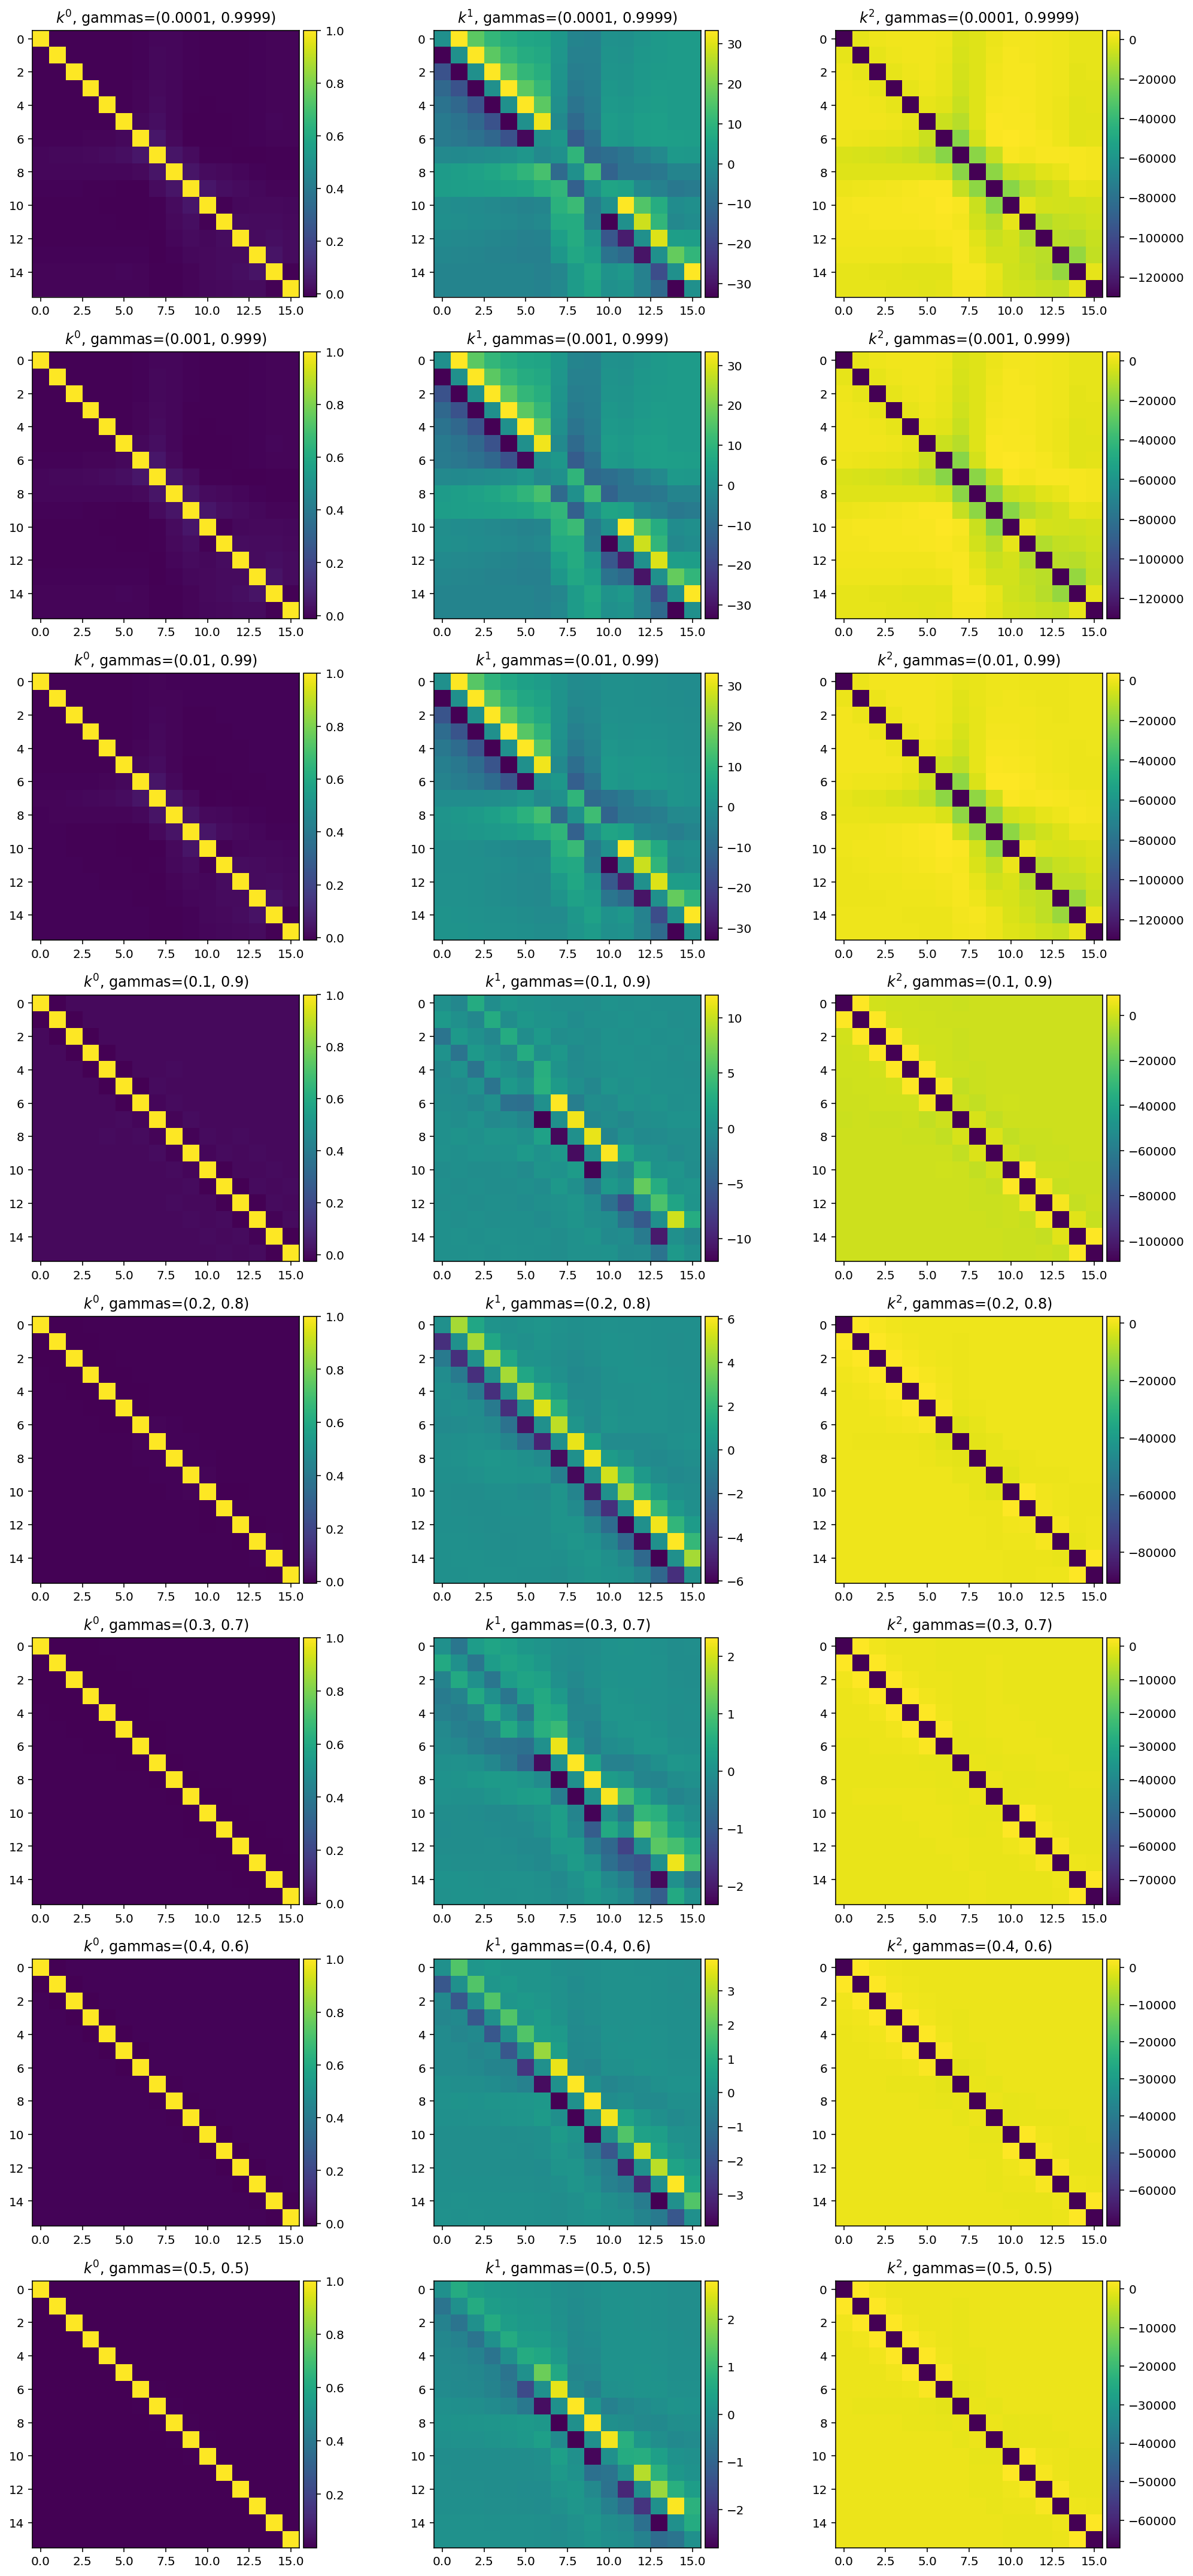

In [8]:
# adapted from Kernel Matrix Analysis notebook
FC = 30
COEF = 0.9

min_separation = COEF / FC
N = int(0.5 / min_separation)
support = jittered_supports(N, min_separation=min_separation)

fig, axs = plt.subplots(8, 3, figsize=(15, 30))
fig.set_tight_layout(True)
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)

    for j in [0, 1, 2]:
        im = axs[i, j].imshow([K0, K1, K2][j])
        axs[i, j].set_title(f"$k^{j}$, gammas={gammas[i]}")
        divider = make_axes_locatable(axs[i, j])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(im, cax=cax, orientation="vertical")

#### min_sep = 0.55 / FC

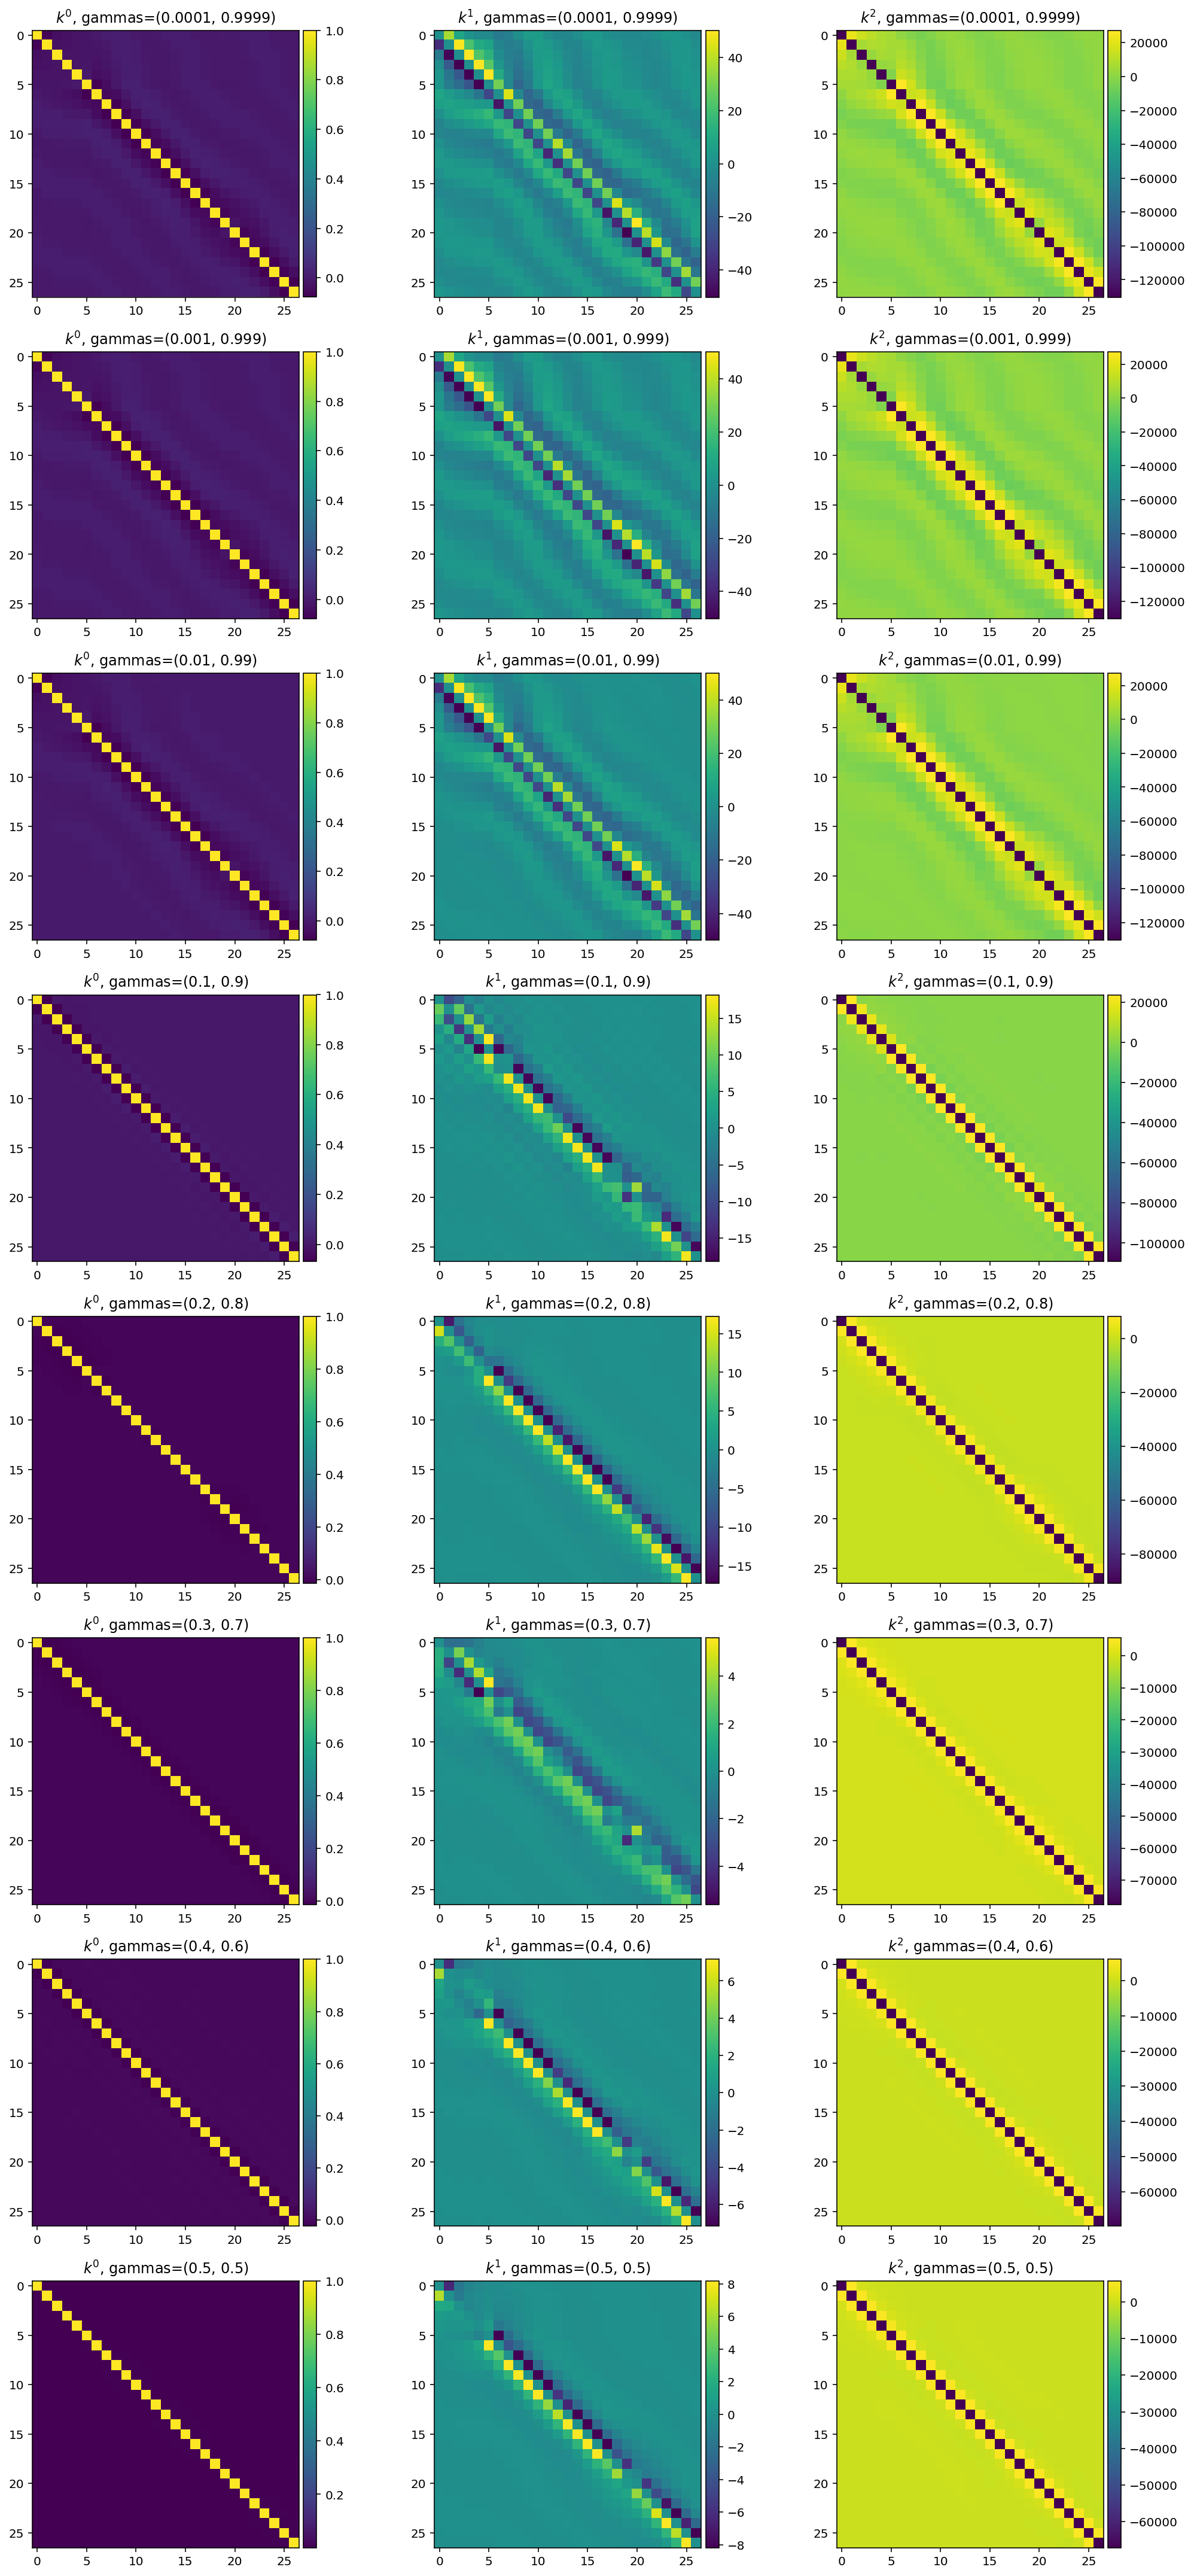

In [9]:
# adapted from Kernel Matrix Analysis notebook
FC = 30
COEF = 0.55

min_separation = COEF / FC
N = int(0.5 / min_separation)
support = jittered_supports(N, min_separation=min_separation)

fig, axs = plt.subplots(8, 3, figsize=(15, 30))
fig.set_tight_layout(True)
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)

    for j in [0, 1, 2]:
        im = axs[i, j].imshow([K0, K1, K2][j])
        axs[i, j].set_title(f"$k^{j}$, gammas={gammas[i]}")
        divider = make_axes_locatable(axs[i, j])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(im, cax=cax, orientation="vertical")

#### min_sep = 0.45 / FC

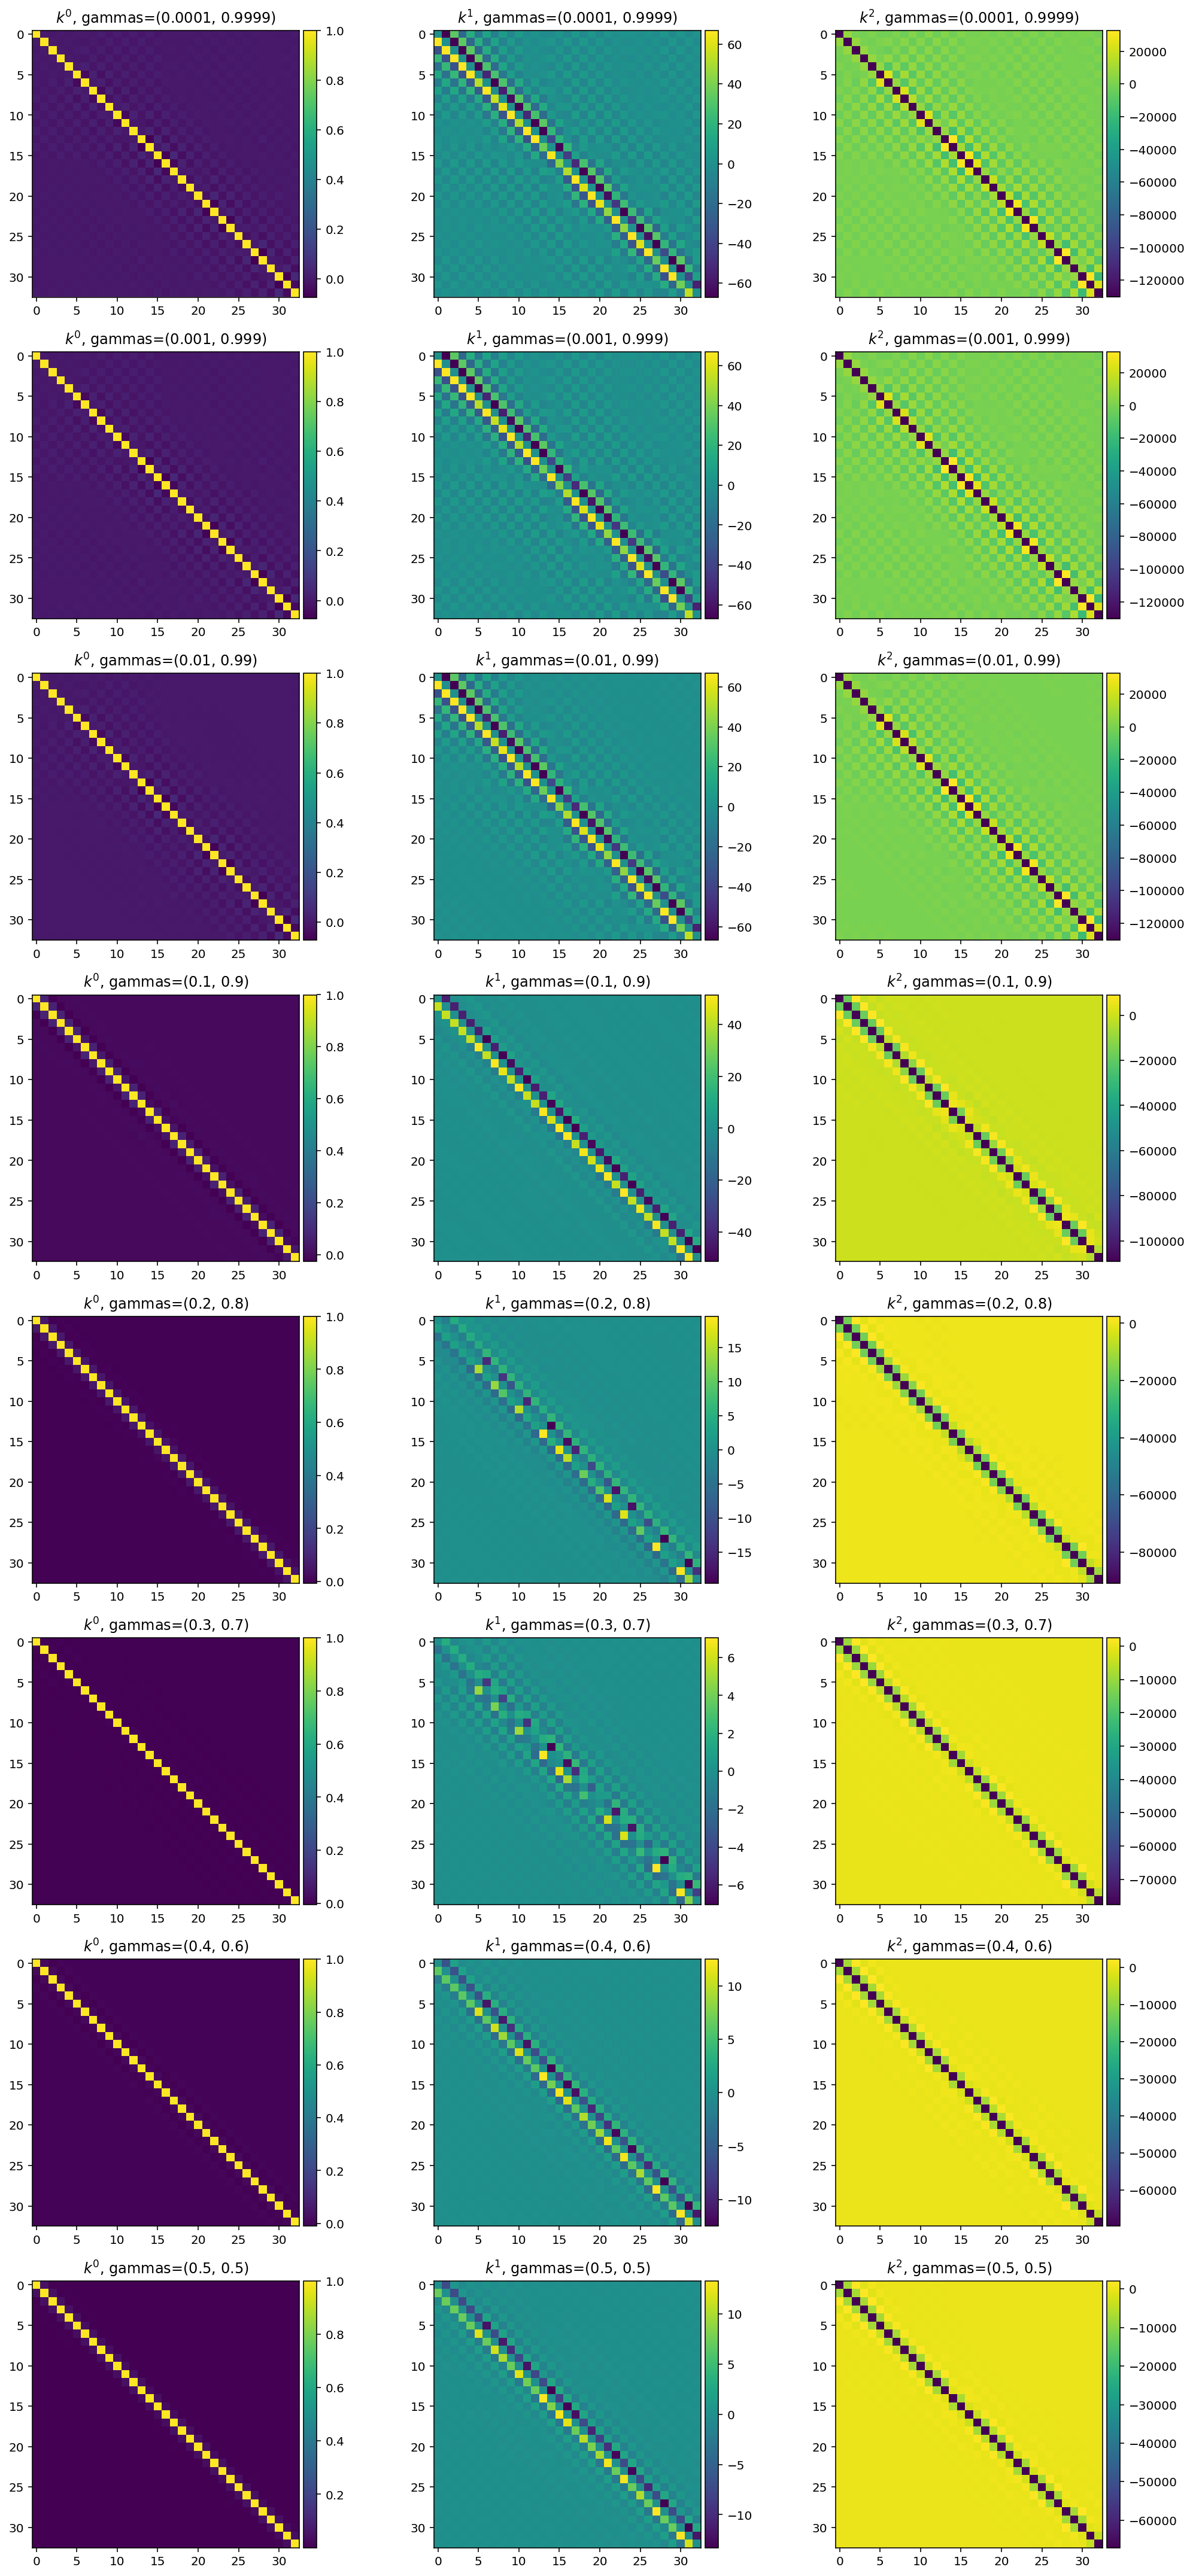

In [10]:
# adapted from Kernel Matrix Analysis notebook
FC = 30
COEF = 0.45

min_separation = COEF / FC
N = int(0.5 / min_separation)
support = jittered_supports(N, min_separation=min_separation)

fig, axs = plt.subplots(8, 3, figsize=(15, 30))
fig.set_tight_layout(True)
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)

    for j in [0, 1, 2]:
        im = axs[i, j].imshow([K0, K1, K2][j])
        axs[i, j].set_title(f"$k^{j}$, gammas={gammas[i]}")
        divider = make_axes_locatable(axs[i, j])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(im, cax=cax, orientation="vertical")

### Next step: how small do eigenvalues get for each K0, and what are L-infinity norms of $K_0^{-1}k_0(t)$ and $K_0^{-1}K_1$

### Eigenvalues of $K_0$—don't want these to get too small

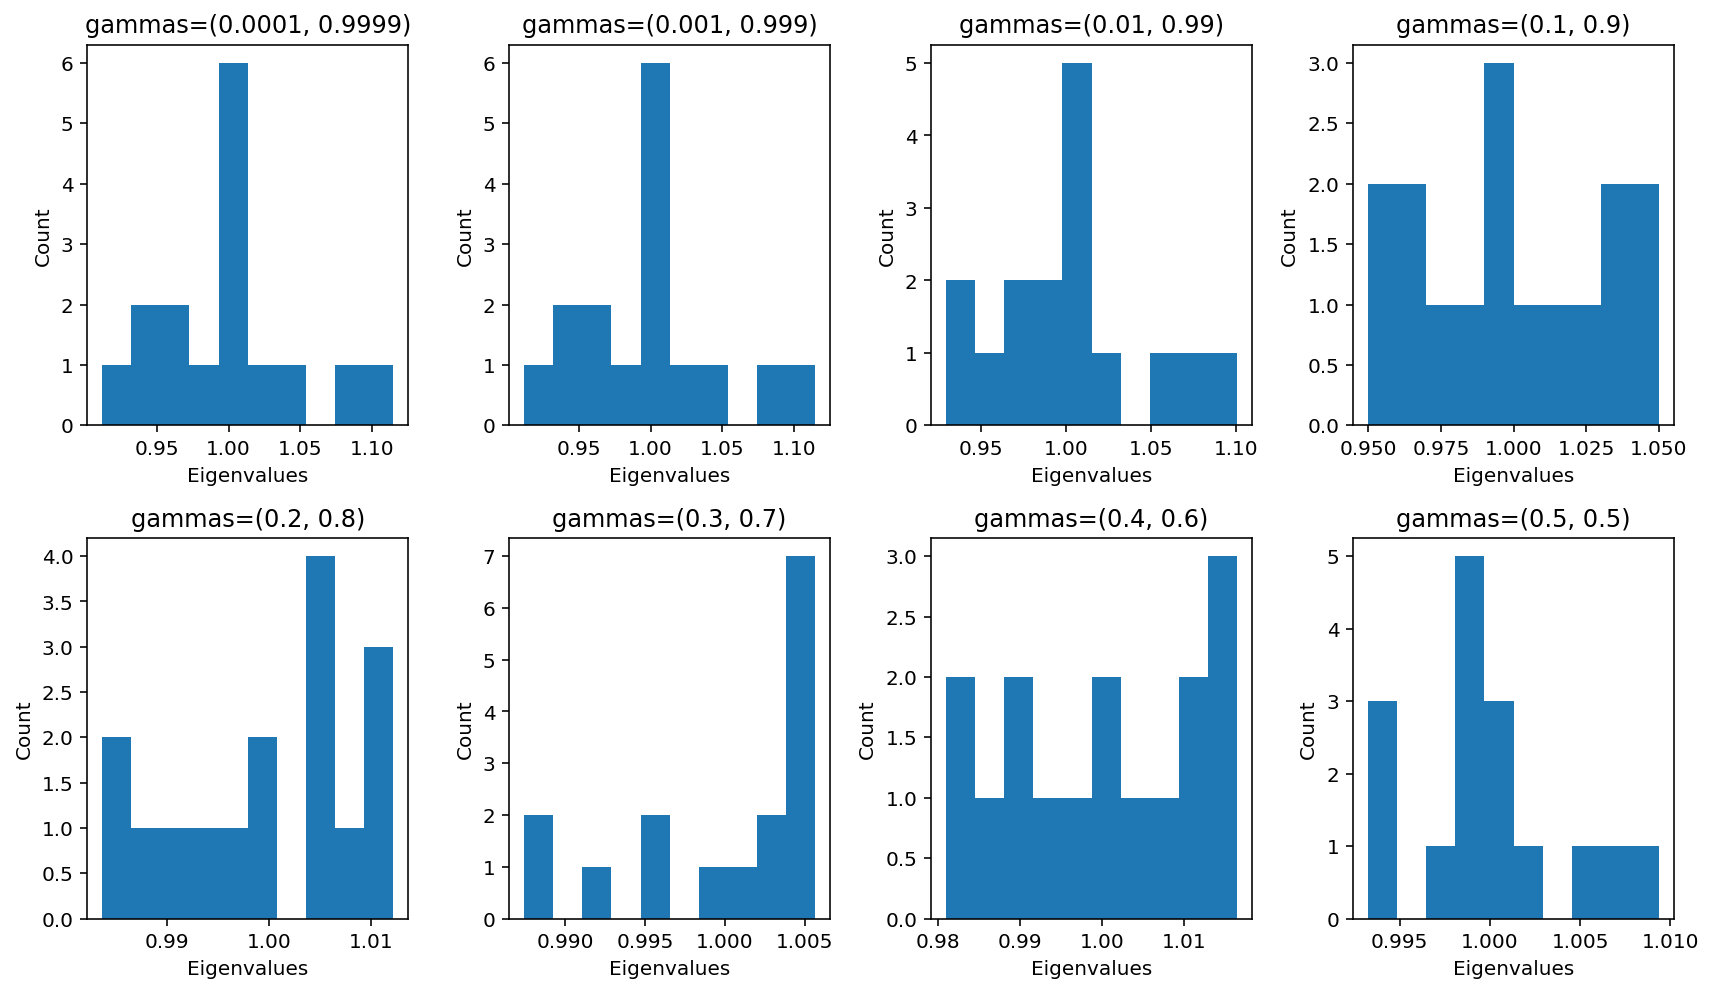

In [11]:
FC = 30
COEF = 0.9

min_separation = COEF / FC
N = int(0.5 / min_separation)
support = jittered_supports(N, min_separation=min_separation)

fig, axs = plt.subplots(2, 4, figsize=(12, 7))
fig.set_tight_layout(True)
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    val, vec = np.linalg.eig(K0)
    eigenval = abs(val)
    axs.flatten()[i].hist(eigenval)
    axs.flatten()[i].set_title(f"gammas={gammas[i]}")
    axs.flatten()[i].set_xlabel("Eigenvalues")
    axs.flatten()[i].set_ylabel("Count")

Eigenvalues are very close to 1 and the K0 plots above show they are very close to I regardless of choice of gamma.

### $L_{\infty}$ norms of $K_0^{-1}K_1$, don't want these too high

Gammas: (0.0001, 0.9999) 637.2697142393106
Gammas: (0.001, 0.999) 637.2697142393106
Gammas: (0.01, 0.99) 637.2697142393106
Gammas: (0.1, 0.9) 457.3717644987842
Gammas: (0.2, 0.8) 450.2643716530368
Gammas: (0.3, 0.7) 449.92799203110667
Gammas: (0.4, 0.6) 450.20617514134995
Gammas: (0.5, 0.5) 450.3074412621022


Text(0, 0.5, '$L_{\\infty}$ norm of $K_0^{-1}K_1$')

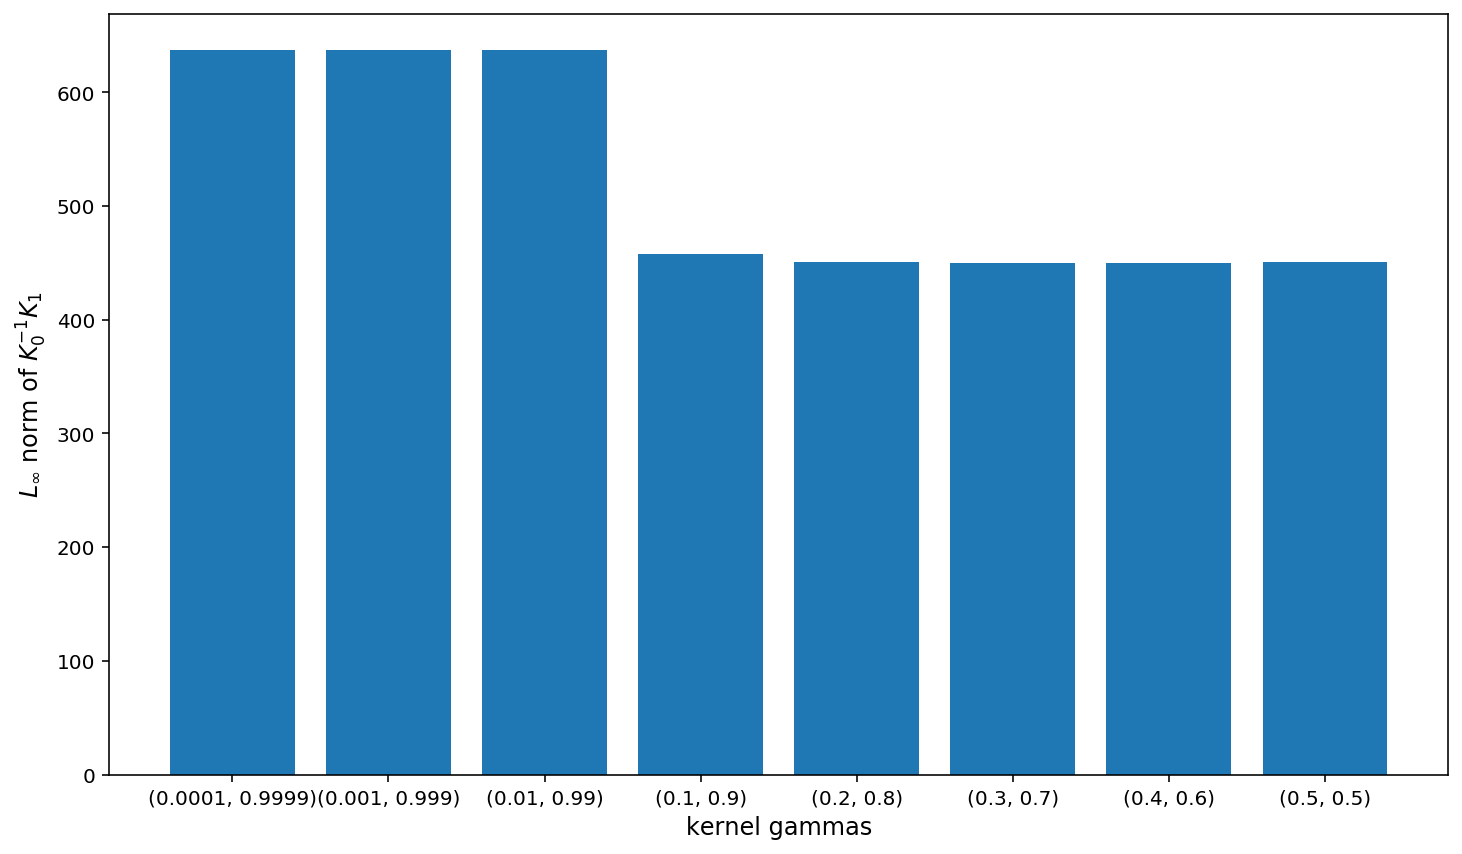

In [12]:
fc = 30
min_separation = 0.65 / (2.0 * fc + 1)
N = int(0.5 / min_separation)
support = uniform_supports(N, min_separation=min_separation)
norms = []
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    norm = np.linalg.norm(np.linalg.solve(K0, K1), np.inf)
    norms.append(norm)
    print("Gammas:", gammas[i], norm)
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar([str(gammas[i]) for i in range(len(gammas))], norms)
ax.set_xlabel("kernel gammas", size=12)
ax.set_ylabel("$L_{\infty}$ norm of $K_0^{-1}K_1$", size=12)

Gammas: (0.0001, 0.9999) 340063.8852210486
Gammas: (0.001, 0.999) 340063.8852210486
Gammas: (0.01, 0.99) 340063.8852210486
Gammas: (0.1, 0.9) 2658508.4811891997
Gammas: (0.2, 0.8) 363290.5849317764
Gammas: (0.3, 0.7) 876709.027808192
Gammas: (0.4, 0.6) 1190410.9165685552
Gammas: (0.5, 0.5) 1138970.886890826


Text(0, 0.5, '$L_{\\infty}$ norm of $K_0^{-1}K_1$')

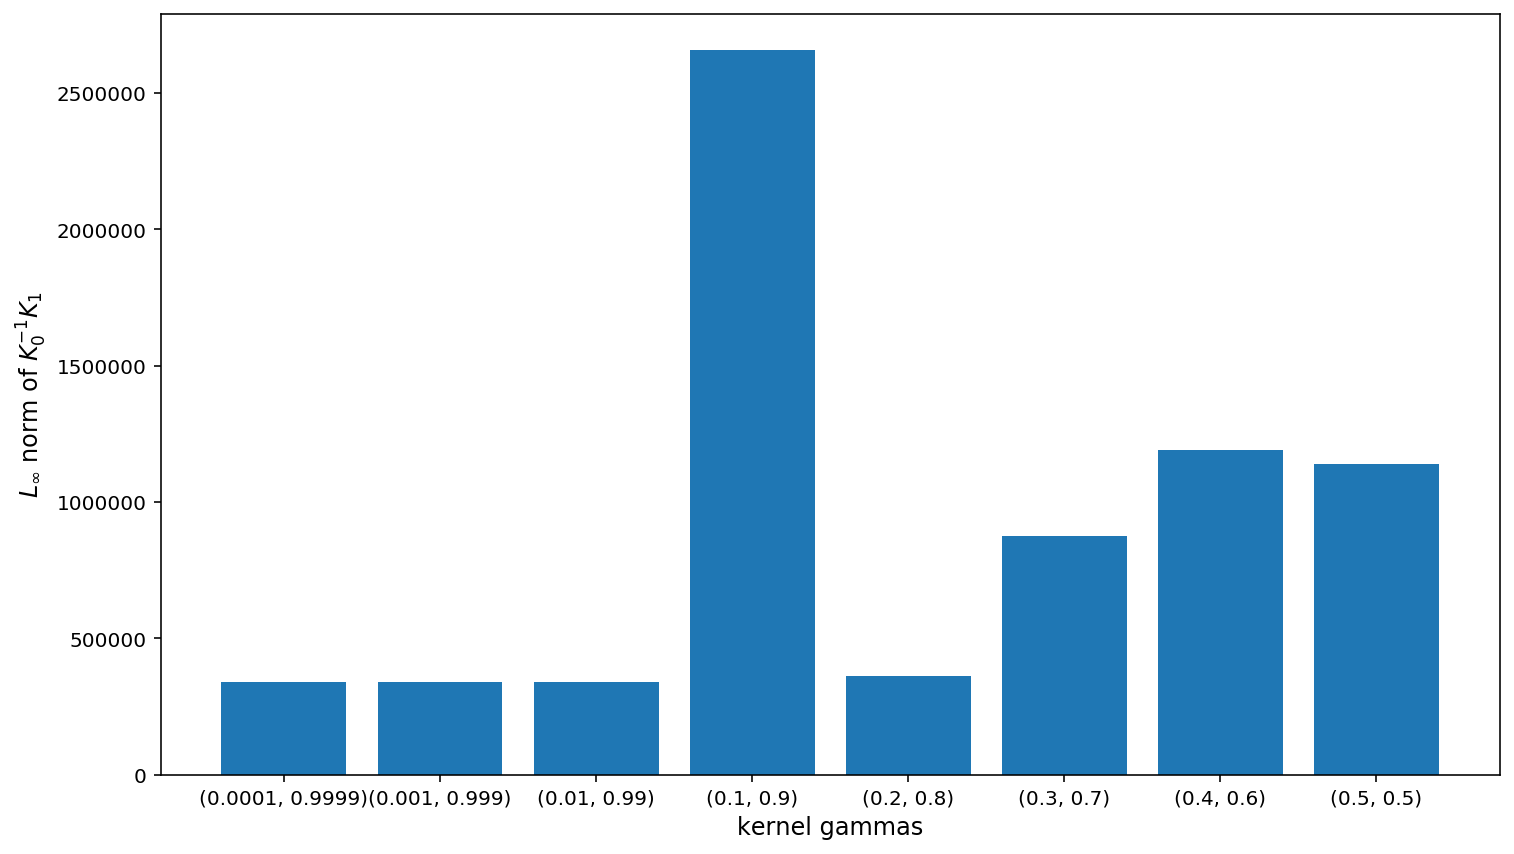

In [13]:
fc = 30
min_separation = 0.65 / (2.0 * fc + 1)
N = int(0.5 / min_separation)
support = jittered_supports(N, min_separation=min_separation)
norms = []
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    norm = np.linalg.norm(np.linalg.solve(K0, K1), np.inf)
    norms.append(norm)
    print("Gammas:", gammas[i], norm)
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar([str(gammas[i]) for i in range(len(gammas))], norms)
ax.set_xlabel("kernel gammas", size=12)
ax.set_ylabel("$L_{\infty}$ norm of $K_0^{-1}K_1$", size=12)

Lowest L-inf norm for gammas that are very far (e.g. 0.0001 and 0.9999), though jitter randomness changes it. 0.4/0.6 and 0.5/0.5 are consistently worst.

### $L_{\infty}$ norms of $K_0^{-1}k_0(t)$, don't want these too high

In [14]:
# todo
# pick values of t where it is a midpt between support points

TODO:

To start:
Pick 1 coordinate of $K_0^{-1}k_0(t)$ ($t$ is a midpt between supports) and plot this coordinate.

- it should be 1 at the first time point

Then fix min_sep:

- plot the full second term $D_{\beta}[k_1(t)-K_1K_0^{-1}k_0(t)]$ (and/or possibly the two inner terms separately). 
- It should be 0 at the first time point, but then what?
- are the two terms $k_1(t)$ and $K_1K_0^{-1}k_0(t)$ close to each other?
- is the difference way smaller than the first term?

### $L_{\infty}$ norms of $K_0^{-1}k_0(t)$ for first midpoint

In [15]:
def kernel_vector(kernel, t, support):
    t = np.repeat(t, N)
    shifted_supports = t - support
    return kernel.eval(shifted_supports).real

Gammas: (0.0001, 0.9999) 183.50879908798746
Gammas: (0.001, 0.999) 183.50879908798746
Gammas: (0.01, 0.99) 183.50879908798746
Gammas: (0.1, 0.9) 56872.714671716174
Gammas: (0.2, 0.8) 269.8365481741225
Gammas: (0.3, 0.7) 405.48862686456437
Gammas: (0.4, 0.6) 4222.248437617097
Gammas: (0.5, 0.5) 421.690252741834


Text(0, 0.5, '$L_{\\infty}$ norm of $K_0^{-1}k_0(t)$')

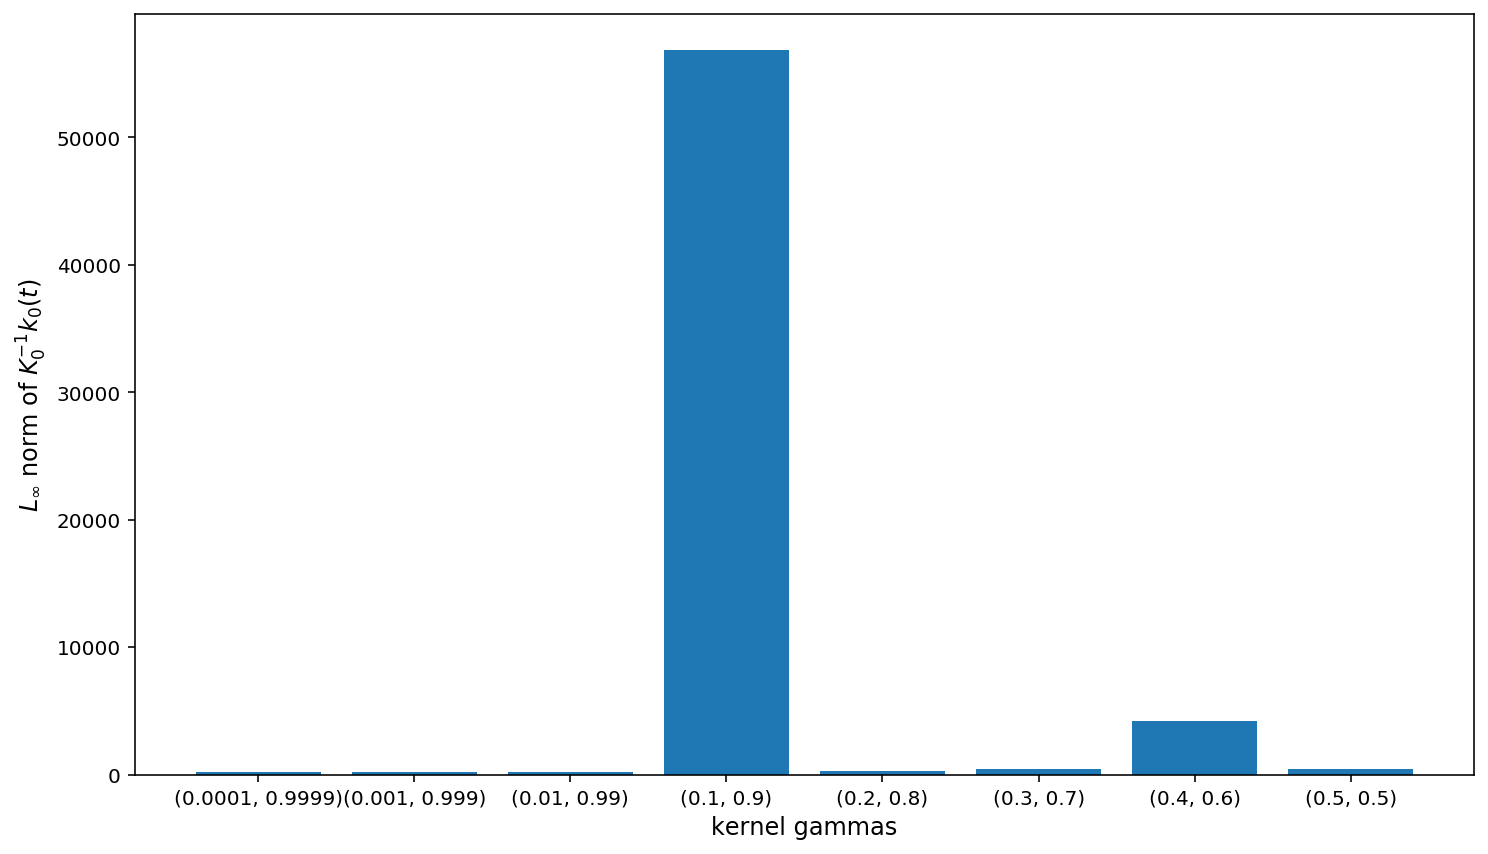

In [16]:
support = jittered_supports(N, min_separation=min_separation)
t = (support[0] + support[1]) / 2
norms = []
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    k0 = kernel_vector(kernel, t, support)
    norm = np.linalg.norm(np.linalg.solve(K0, k0), np.inf)
    norms.append(norm)
    print("Gammas:", gammas[i], norm)
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar([str(gammas[i]) for i in range(len(gammas))], norms)
ax.set_xlabel("kernel gammas", size=12)
ax.set_ylabel("$L_{\infty}$ norm of $K_0^{-1}k_0(t)$", size=12)

### Plot the full second term $D_{\beta}[k_1(t)-K_1K_0^{-1}k_0(t)]$

Gammas: (0.0001, 0.9999) 116.68074768683724
Gammas: (0.001, 0.999) 116.68074768683724
Gammas: (0.01, 0.99) 116.68074768683724
Gammas: (0.1, 0.9) inf
Gammas: (0.2, 0.8) 178.06912137586923
Gammas: (0.3, 0.7) inf
Gammas: (0.4, 0.6) inf
Gammas: (0.5, 0.5) 1808.4100755549155


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


<BarContainer object of 8 artists>

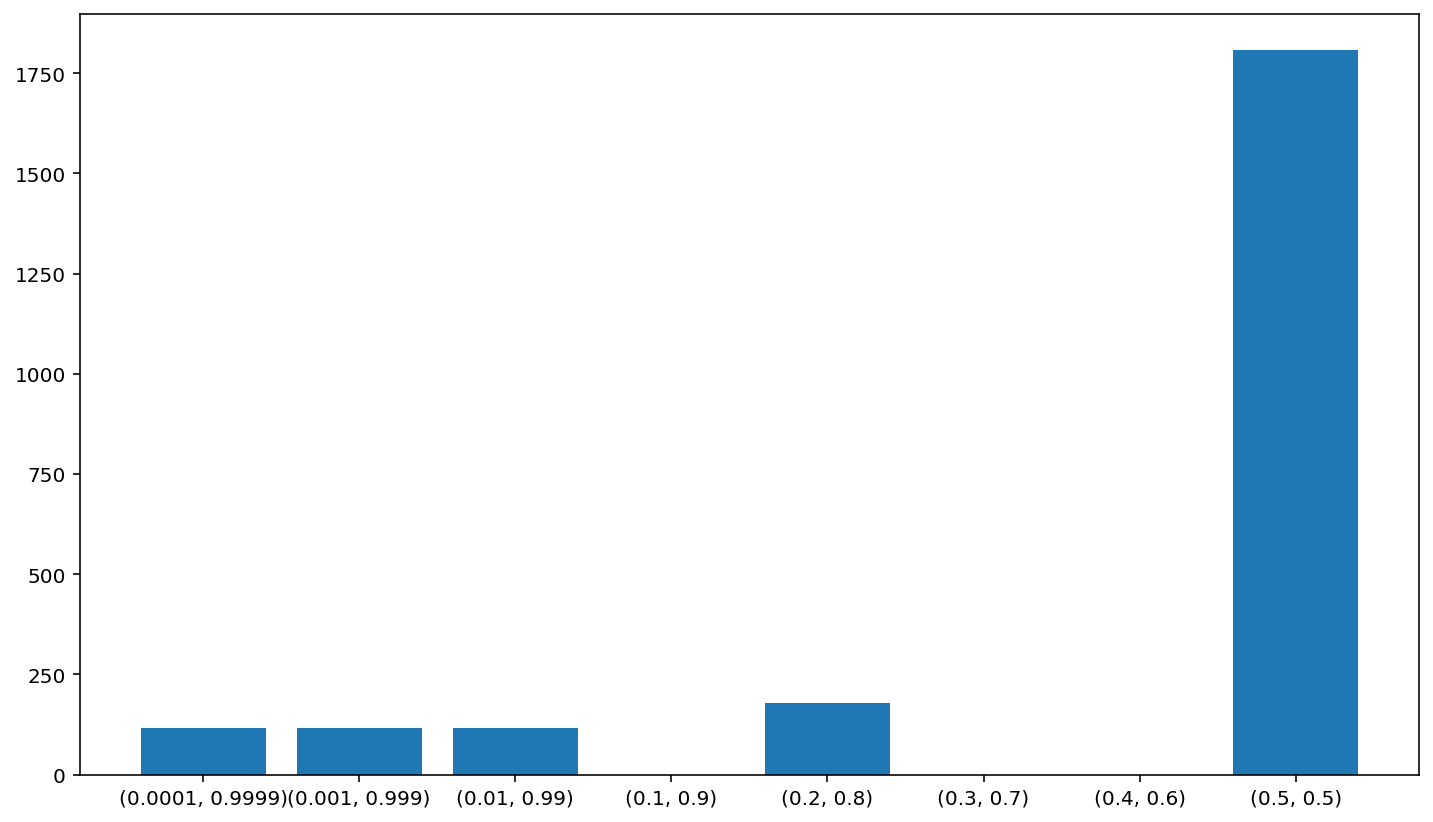

In [17]:
t = (support[0] + support[1]) / 2
norms = []
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    k0 = kernel_vector(kernel, t, support)
    k1 = kernel_vector(kernel.derivative(), t, support)
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)
    K0iK1 = np.linalg.solve(K0, K1)
    beta = np.divide(np.diag(K0iK1), (np.diag(K2) - np.diag(np.matmul(K1, K0iK1))))
    d_beta = np.zeros((N, N), float)
    np.fill_diagonal(d_beta, beta)
    second_term = np.matmul(d_beta, k1 - np.matmul(K1, np.linalg.solve(K0, k0)))
    norm = np.linalg.norm(second_term, np.inf)
    norms.append(norm)
    print("Gammas:", gammas[i], norm)
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar([str(gammas[i]) for i in range(len(gammas))], norms)

### Are the two terms $k_1(t)$ and $K_1K_0^{-1}k_0(t)$ close to each other?

Gammas: (0.0001, 0.9999) 4.6862981817330507e-07
Gammas: (0.001, 0.999) 4.6862981817330507e-07
Gammas: (0.01, 0.99) 4.6862981817330507e-07
Gammas: (0.1, 0.9) 1.6376987353794448e-05
Gammas: (0.2, 0.8) 8.724668063564422e-07
Gammas: (0.3, 0.7) 6.519051538589338e-07
Gammas: (0.4, 0.6) 1.2857451588922306e-06
Gammas: (0.5, 0.5) 5.695056427279521e-07


<BarContainer object of 8 artists>

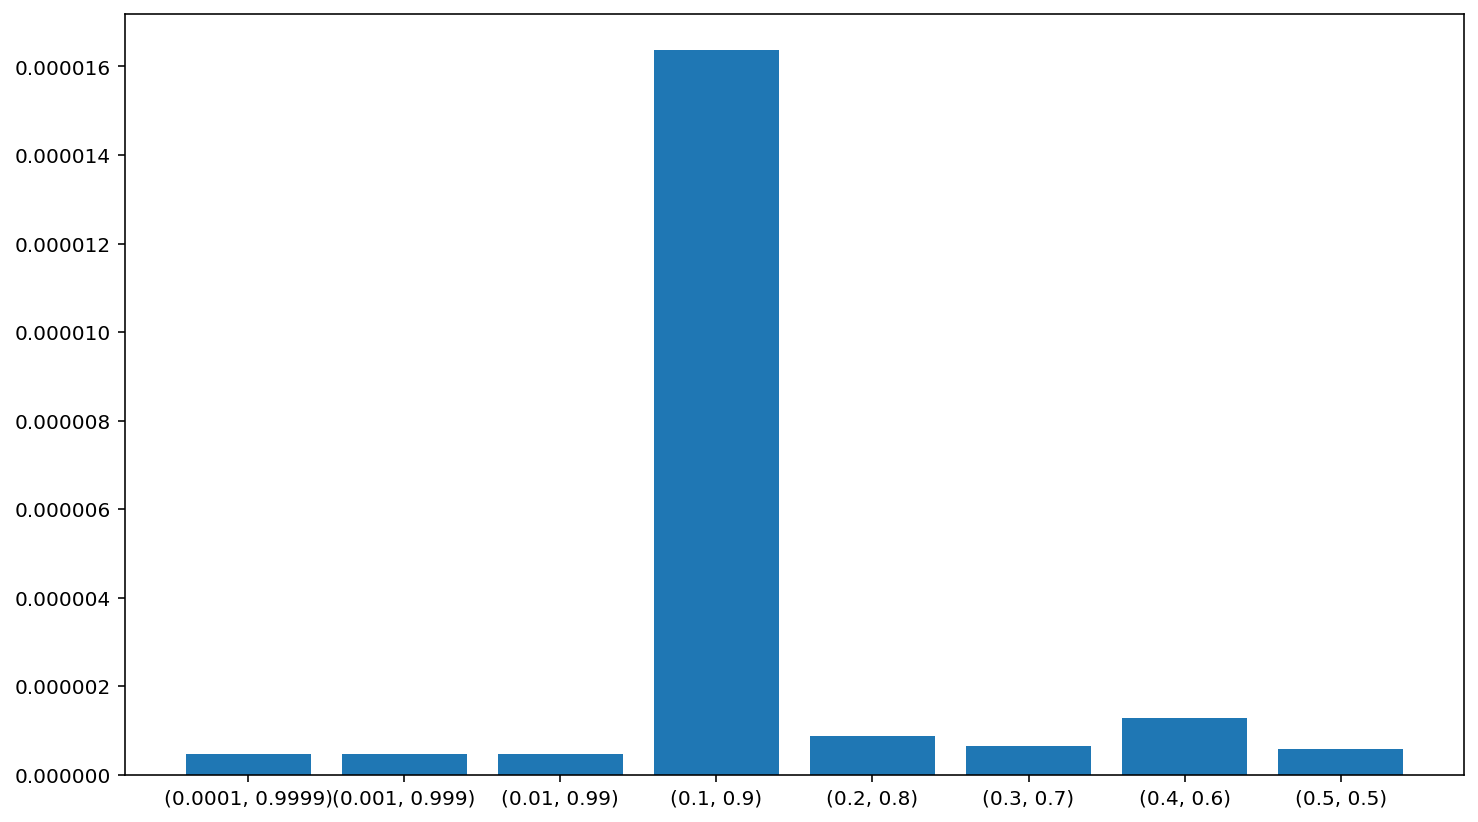

In [18]:
t = (support[0] + support[1]) / 2
norms = []
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    k0 = kernel_vector(kernel, t, support)
    k1 = kernel_vector(kernel.derivative(), t, support)
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    norm = np.linalg.norm(k1 - np.matmul(K1, np.linalg.solve(K0, k0)), np.inf)
    norms.append(norm)
    print("Gammas:", gammas[i], norm)
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar([str(gammas[i]) for i in range(len(gammas))], norms)

### Is the difference way smaller than the first term?

Gammas: (0.0001, 0.9999) 183.50879908798746 116.68074768683724
Gammas: (0.001, 0.999) 183.50879908798746 116.68074768683724
Gammas: (0.01, 0.99) 183.50879908798746 116.68074768683724
Gammas: (0.1, 0.9) 56872.714671716174 inf
Gammas: (0.2, 0.8) 269.8365481741225 178.06912137586923
Gammas: (0.3, 0.7) 405.48862686456437 inf
Gammas: (0.4, 0.6) 4222.248437617097 inf
Gammas: (0.5, 0.5) 421.690252741834 1808.4100755549155


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


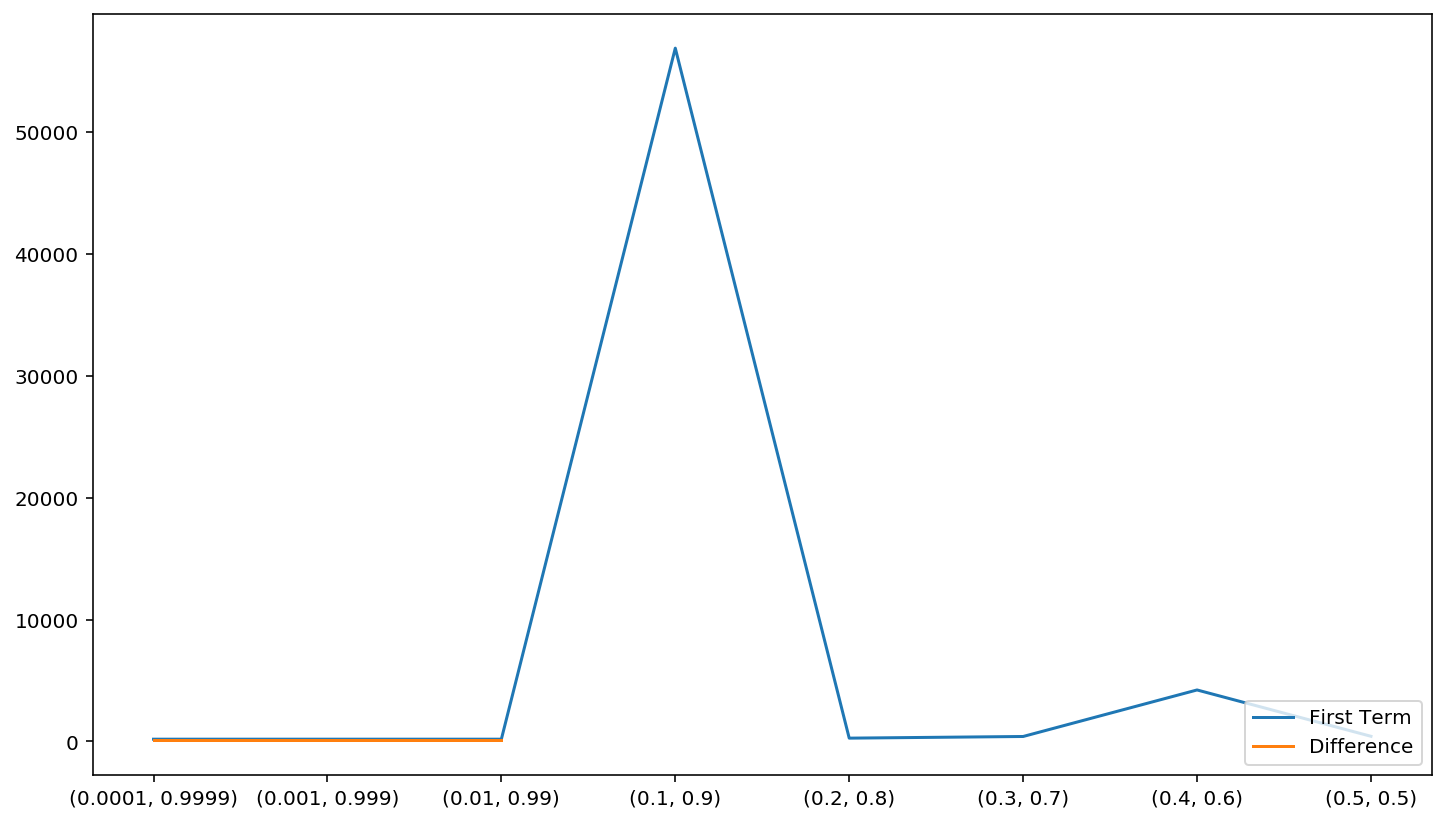

In [19]:
t = (support[0] + support[1]) / 2
norms_diff = []
norms_first = []
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    k0 = kernel_vector(kernel, t, support)
    k1 = kernel_vector(kernel.derivative(), t, support)
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)
    K0iK1 = np.linalg.solve(K0, K1)
    beta = np.divide(np.diag(K0iK1), (np.diag(K2) - np.diag(np.matmul(K1, K0iK1))))
    d_beta = np.zeros((N, N), float)
    np.fill_diagonal(d_beta, beta)
    norm_diff = np.linalg.norm(
        d_beta @ (k1 - np.matmul(K1, np.linalg.solve(K0, k0))), np.inf
    )
    norm_first = np.linalg.norm(np.linalg.solve(K0, k0), np.inf)
    norms_diff.append(norm_diff)
    norms_first.append(norm_first)
    print("Gammas:", gammas[i], norm_first, norm_diff)
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot([str(gammas[i]) for i in range(len(gammas))], norms_first, label="First Term")
ax.plot([str(gammas[i]) for i in range(len(gammas))], norms_diff, label="Difference")
ax.legend(loc="lower right")

## Plots 

In [76]:
from trig_poly import TrigPoly
import test_data

In [119]:
x = np.random.random(5)
y = np.random.uniform(0,1-x)
z = 1-x-y
fc = 25

min_separation = 0.9 / fc 
N = int(1.0 / min_separation) - 6

support = test_data.jittered_supports(N, min_separation=min_separation, jitter_factor=5, jitter_ratio=1.0)

gammas_3= list(zip(x,y,z))

## Plot of $d_{\beta} k_1(t)$ (blue) and $d_{\beta} K_1 K_0^{-1} k_0(t)$(red) for the 6th coordinate for different triple dirichlet kernels and minimum separation of 0.9.

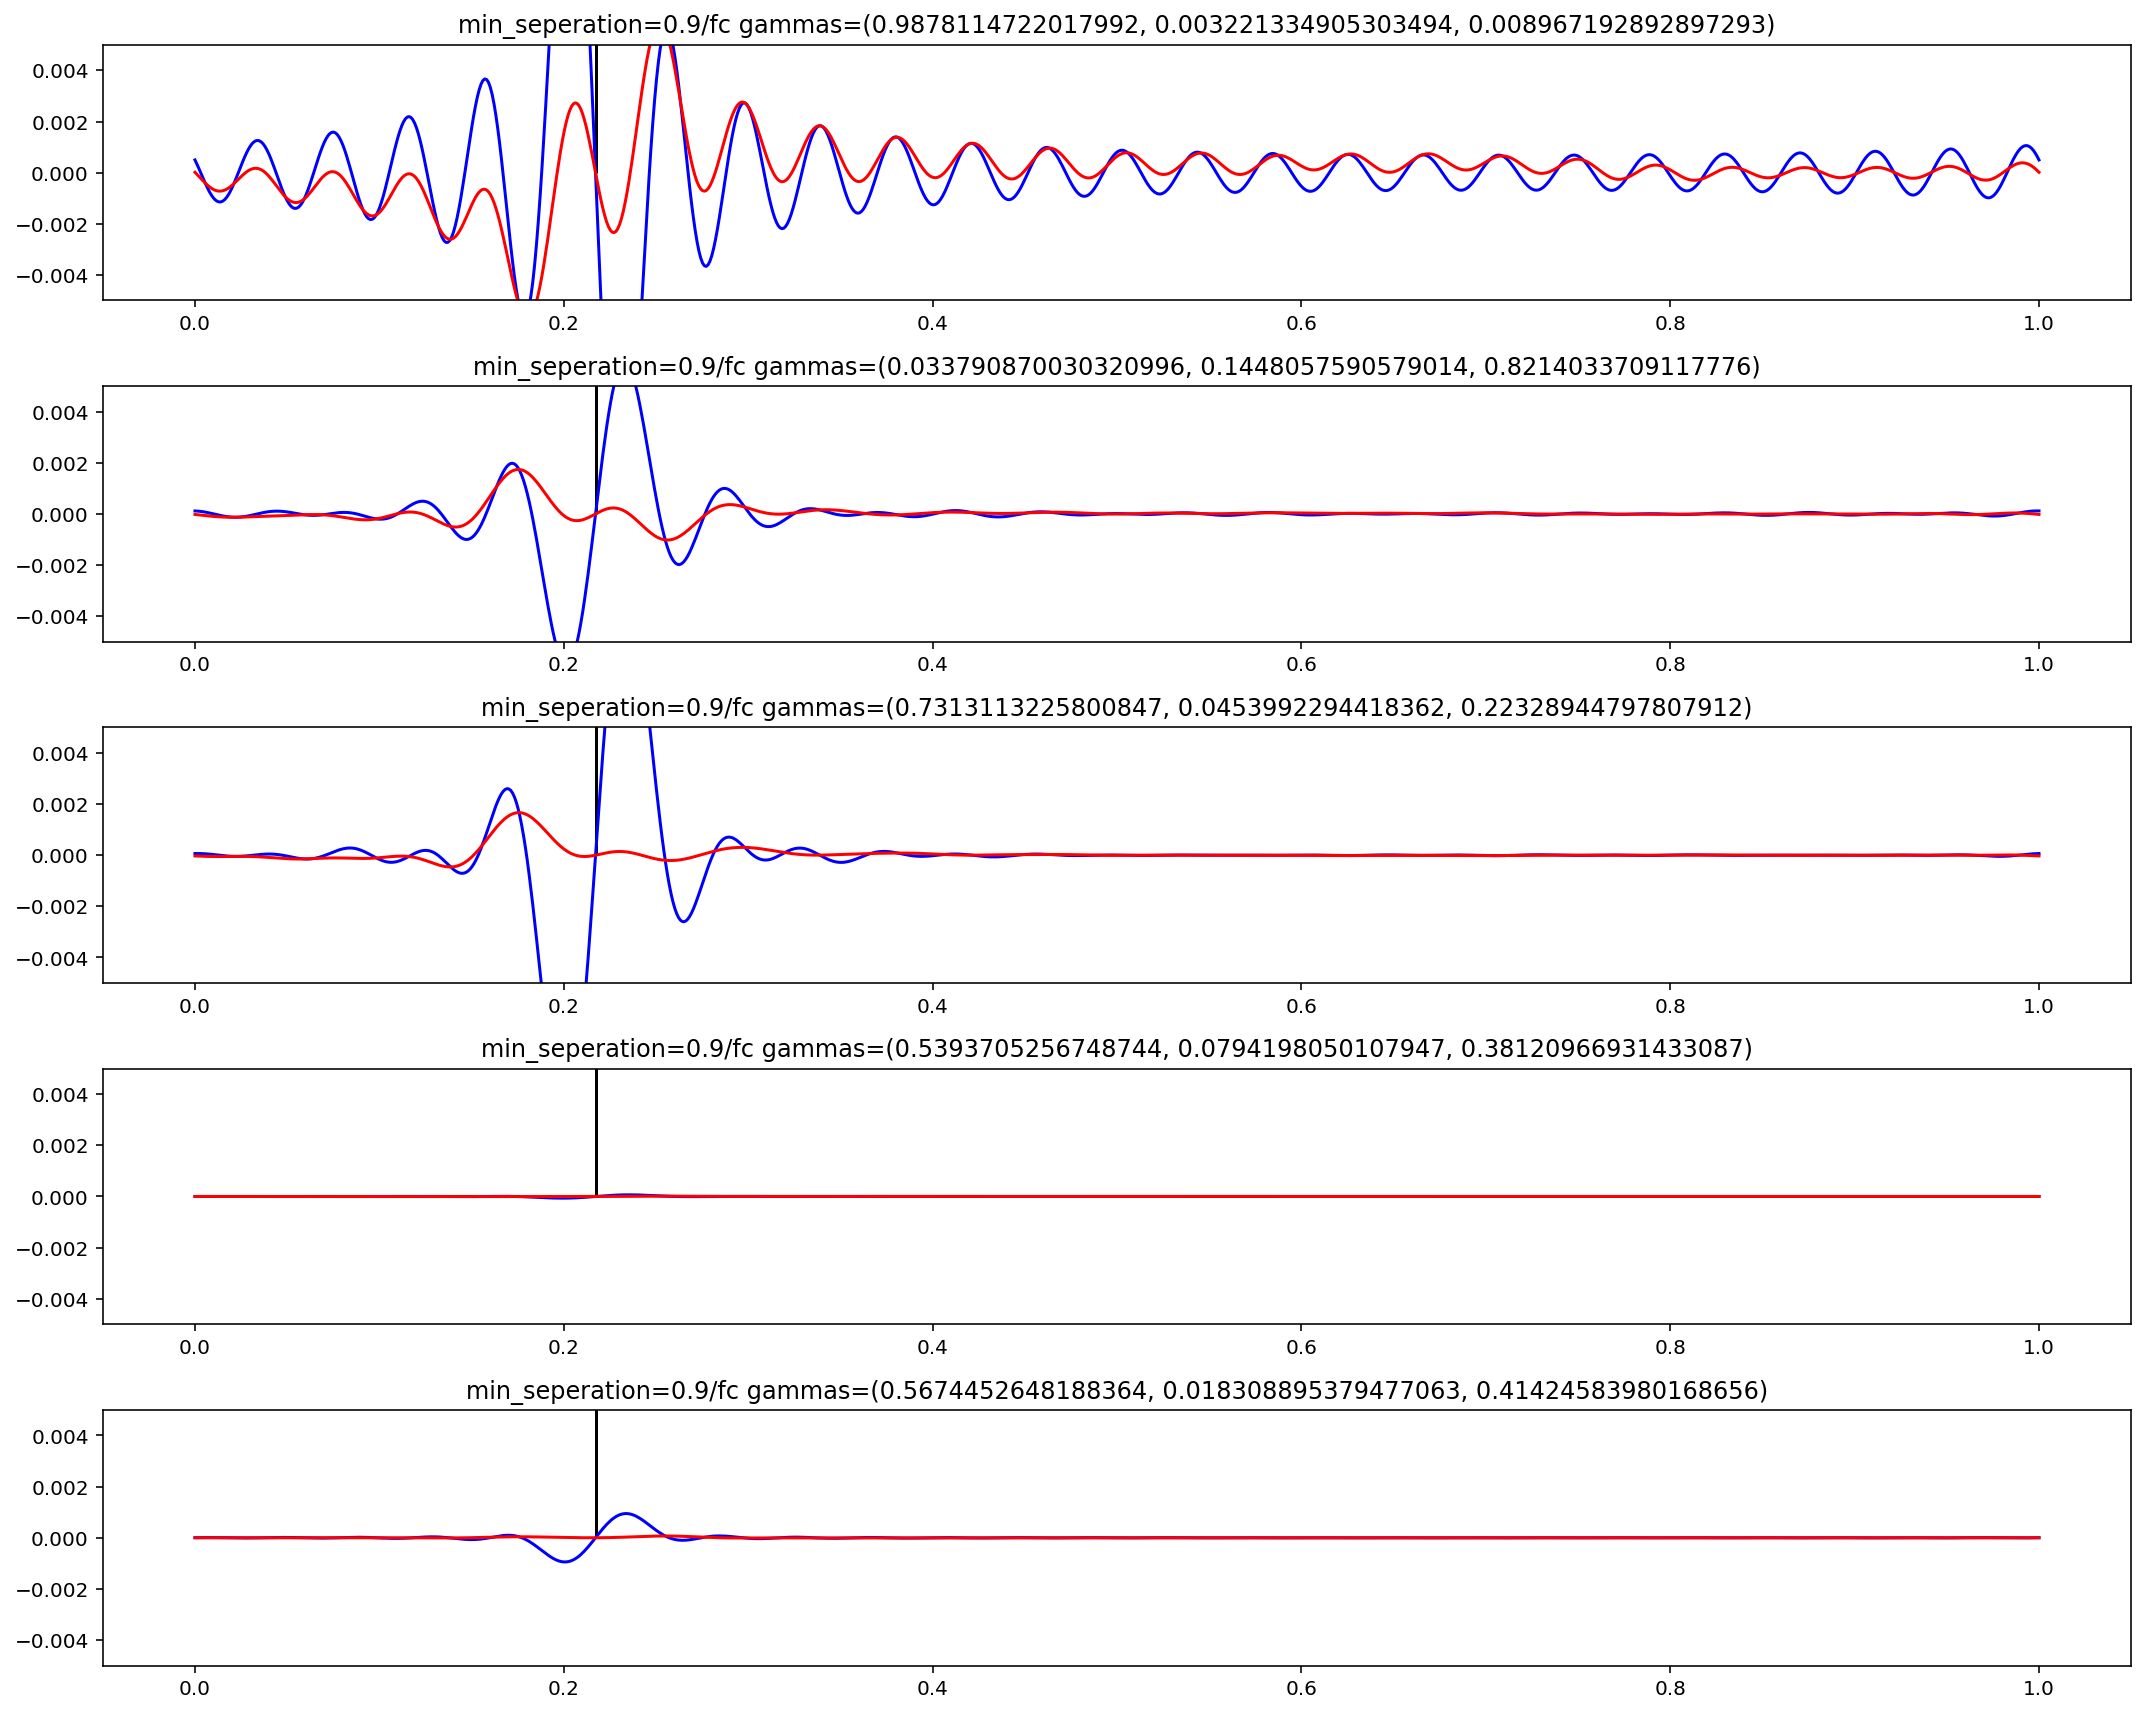

In [120]:
# fc = 25
# seperations = [0.9,0.65,0.5]
kernel = TrigPoly.dirichlet(fc)
fig, axs = plt.subplots(5, 1, figsize=(15, 12))
fig.set_tight_layout(True)
# GAMMA_1S = [10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1, 0.2, 0.3, 0.4, 0.5]
# gammas = [(g, 1 - g) for g in GAMMA_1S]

for k in range(len(gammas_3)):
#     for j,i in enumerate(seperations):
#     min_separation = 0.9 / fc
#     N = int(1.0 / min_separation) - 6
#     support = test_data.jittered_supports(N, min_separation=min_separation, jitter_factor=5, jitter_ratio=1.0)
    kernel = TrigPoly.multi_dirichlet(fc, gammas_3[k])
    beta = np.diag(np.linalg.solve(K0, K1)) / np.diag(K2 - np.dot(K1, np.linalg.solve(K0, K1)))

    ts = np.linspace(0, 1, 1000)
    near_second_deriv_bound_values = []
    between_bound_values = []
    two=[]
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)
    K0iK1 = np.linalg.solve(K0, K1)
    beta = np.divide(np.diag(K0iK1), (np.diag(K2) - np.diag(np.matmul(K1, K0iK1))))
    d_beta = np.zeros((N, N), float)
    np.fill_diagonal(d_beta, beta)

    for t in ts:
        k0 = kernel_vector(kernel, t, support)
        k1 = kernel_vector(kernel.derivative(), t, support)
#         between_bound_values.append(np.linalg.norm(
# #             np.linalg.solve(K0, k0) + 
#             d_beta @ k1,2))
                                    
#         two.append(np.linalg.norm(d_beta@np.matmul(K1, np.linalg.solve(K0, k0)), 2))
        between_bound_values.append((d_beta @ k1)[5])
        two.append((d_beta@np.matmul(K1, np.linalg.solve(K0, k0)))[5])
#                 (np.linalg.solve(K0, k0) + 
#                  (d_beta @ (k1 - np.matmul(K1, np.linalg.solve(K0, k0))))[5])
    axs.flatten()[k].plot(ts,between_bound_values, color="blue")
    axs.flatten()[k].set_title(f"min_seperation=0.9/fc gammas={gammas_3[k]}")
#     axs.flatten()[k].plot(ts,np.repeat(0,len(between_bound_values)),color="red")
    axs.flatten()[k].plot(ts,two,color="red")
    axs.flatten()[k].set_ylim([-0.005,0.005])
    axs.flatten()[k].vlines(support[5], 0, 1)

## Plot of $l_2$ norm of $q(t)$  for different triple dirichlet kernels and minimum separation of 0.9.

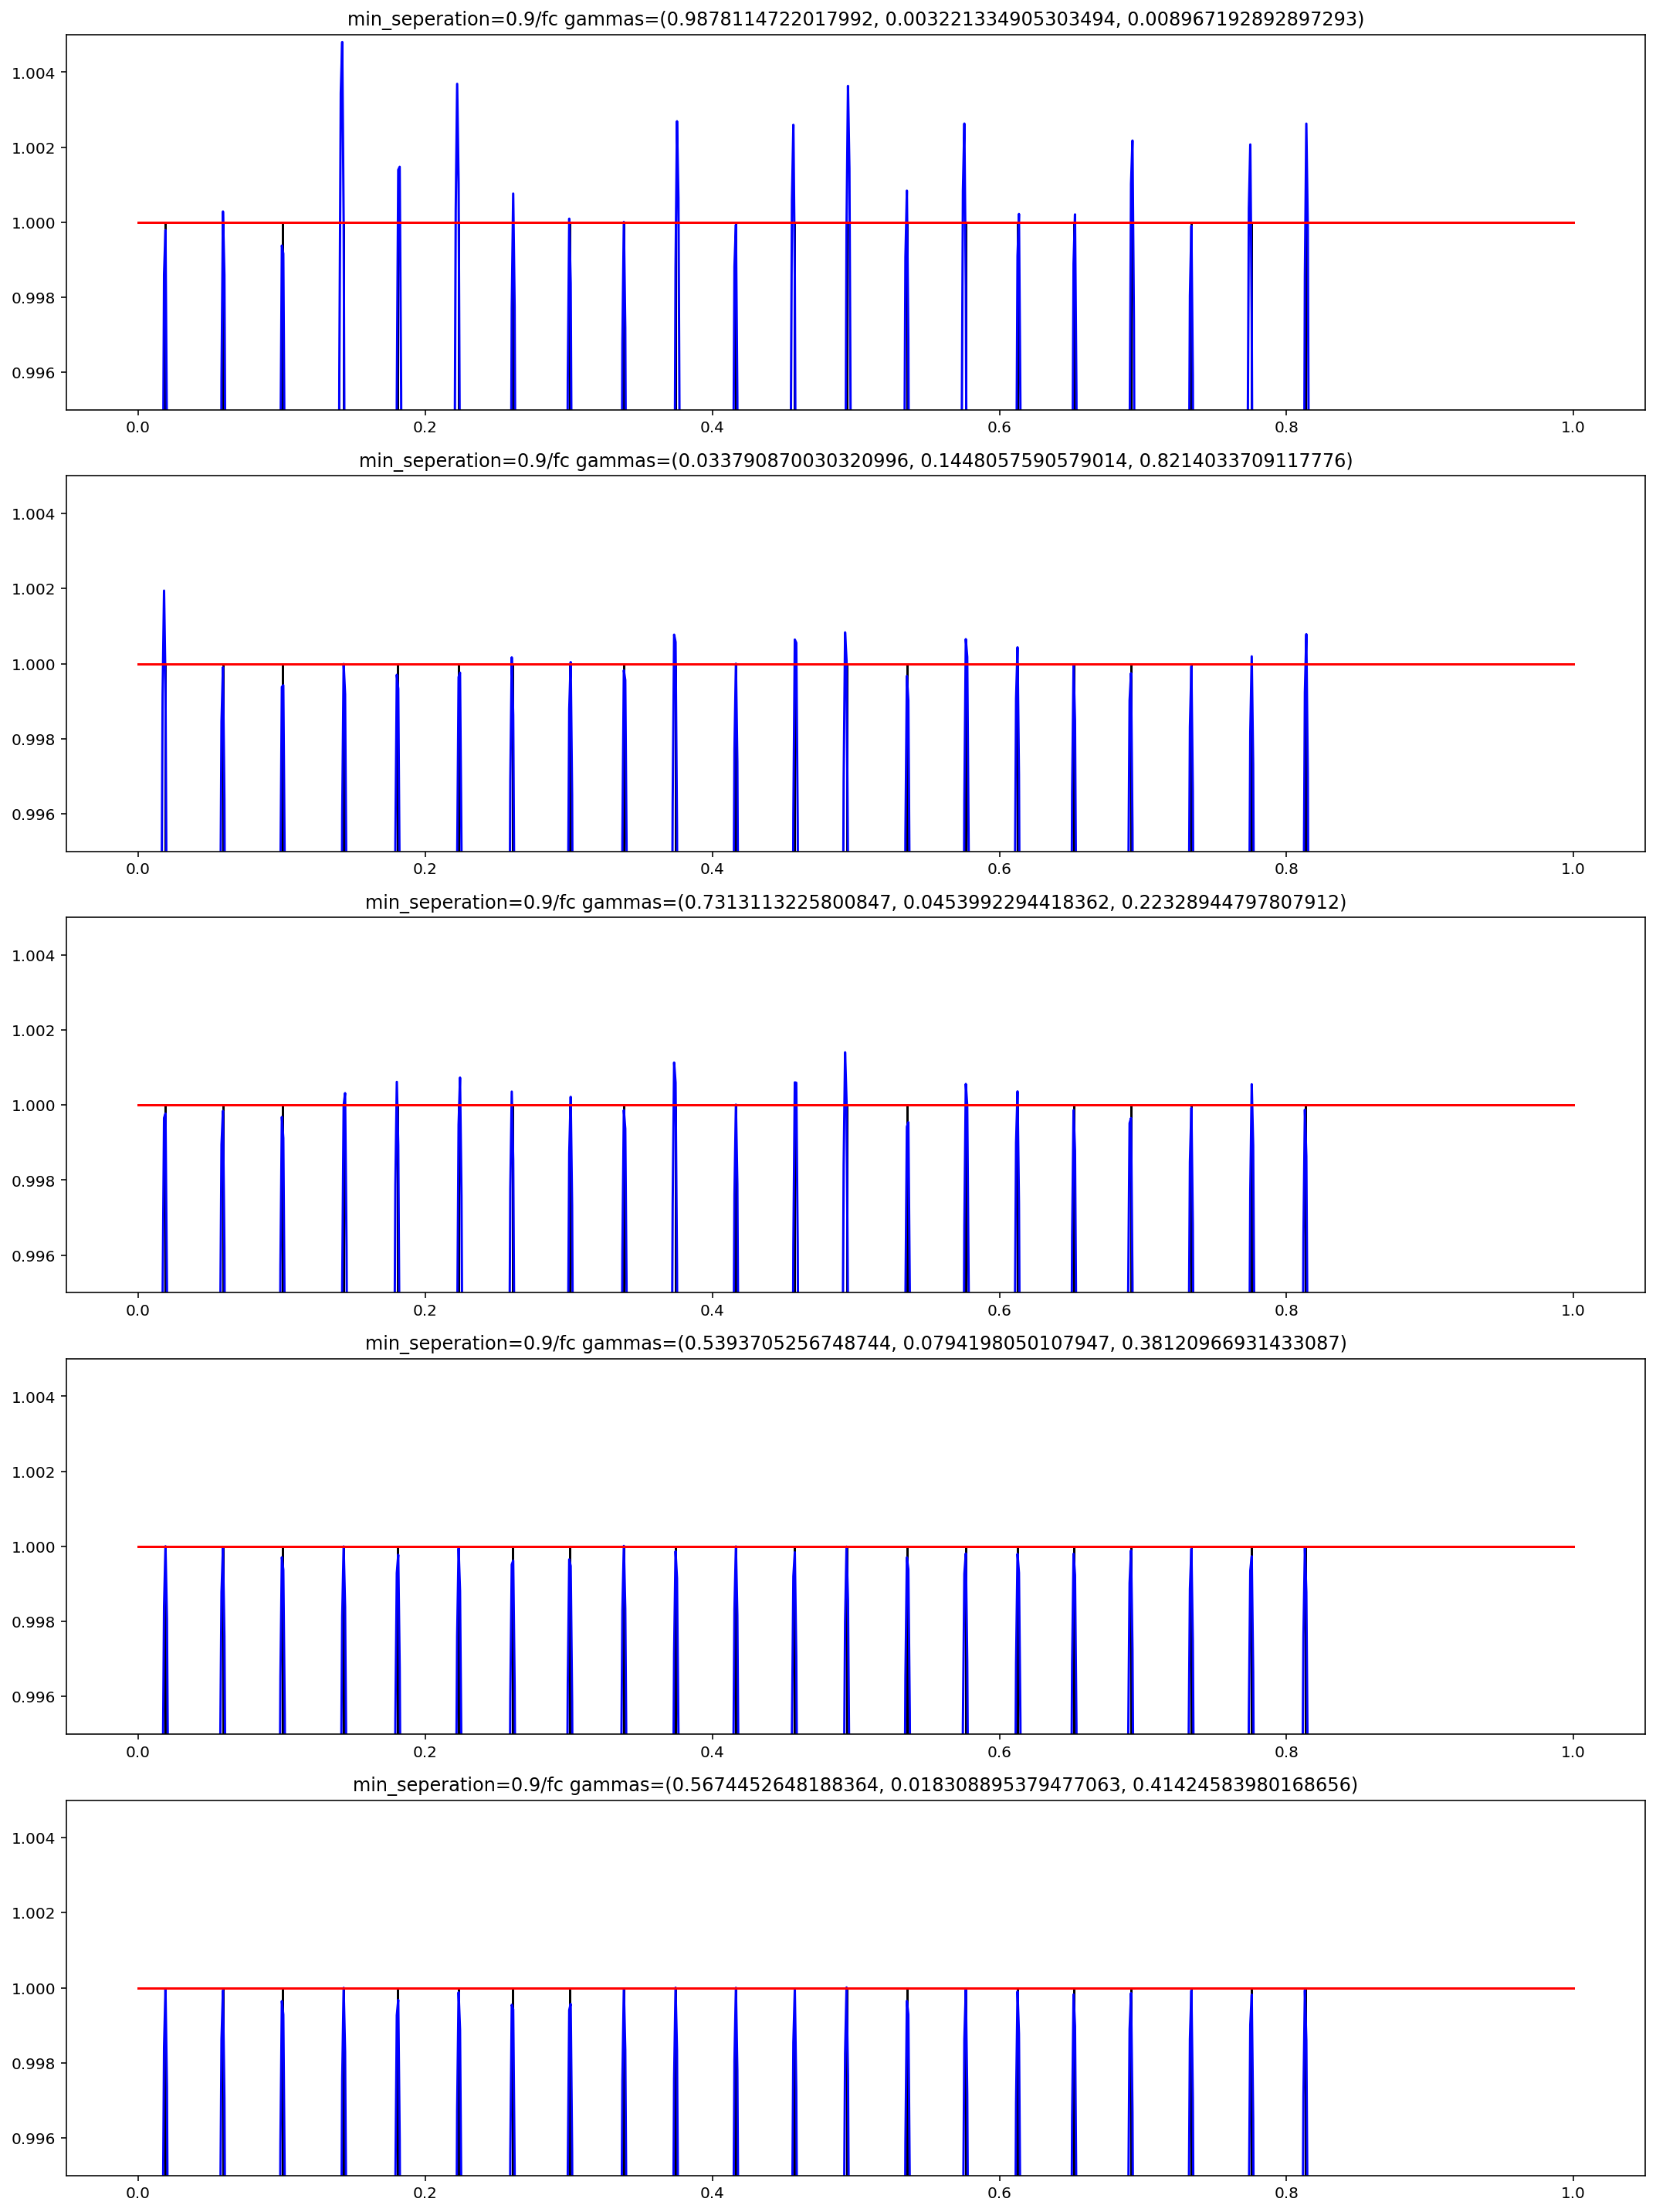

In [125]:
# min_separation = 0.9 / fc 
# N = int(1.0 / min_separation) - 6

# support = test_data.jittered_supports(N, min_separation=min_separation, jitter_factor=5, jitter_ratio=1.0)
kernel = TrigPoly.dirichlet(fc)
fig, axs = plt.subplots(5, 1, figsize=(15, 20))
fig.set_tight_layout(True)
# GAMMA_1S = [10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1, 0.2, 0.3, 0.4, 0.5]
# gammas = [(g, 1 - g) for g in GAMMA_1S]

for k in range(len(gammas_3)):
#     for j,i in enumerate(seperations):
#     min_separation = 0.9 / fc
#     N = int(1.0 / min_separation) - 6
#     support = test_data.jittered_supports(N, min_separation=min_separation, jitter_factor=5, jitter_ratio=1.0)
    kernel = TrigPoly.multi_dirichlet(fc, gammas_3[k])
    beta = np.diag(np.linalg.solve(K0, K1)) / np.diag(K2 - np.dot(K1, np.linalg.solve(K0, K1)))

    ts = np.linspace(0, 1, 1000)
    near_second_deriv_bound_values = []
    between_bound_values = []
#     two=[]
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)
    K0iK1 = np.linalg.solve(K0, K1)
    beta = np.divide(np.diag(K0iK1), (np.diag(K2) - np.diag(np.matmul(K1, K0iK1))))
    d_beta = np.zeros((N, N), float)
    np.fill_diagonal(d_beta, beta)

    for t in ts:
        k0 = kernel_vector(kernel, t, support)
        k1 = kernel_vector(kernel.derivative(), t, support)
        between_bound_values.append(np.linalg.norm(
            np.linalg.solve(K0, k0) + 
            d_beta @ (k1 - np.matmul(K1, np.linalg.solve(K0, k0))),2))
                                    
#         two.append(np.linalg.norm(d_beta@np.matmul(K1, np.linalg.solve(K0, k0)), 2))
#         between_bound_values.append
#                 (np.linalg.solve(K0, k0) + 
#                  (d_beta @ (k1 - np.matmul(K1, np.linalg.solve(K0, k0)))))
    axs.flatten()[k].plot(ts,between_bound_values, color="blue")
    axs.flatten()[k].set_title(f"min_seperation=0.9/fc gammas={gammas_3[k]}")
    axs.flatten()[k].plot(ts,np.repeat(1,len(between_bound_values)),color="red")
#     axs.flatten()[k].plot(ts,two,color="red")
    axs.flatten()[k].set_ylim([0.995,1.005])
    axs.flatten()[k].vlines(support, 0, 1)

## Plot of $d_{\beta} k_1(t)$ (blue) and $d_{\beta} K_1 K_0^{-1} k_0(t)$(red) for the 6th coordinate for different double dirichlet kernels and minimum separation of 0.9.

In [121]:
min_separation = 0.9 / fc 
N = int(1.0 / min_separation) - 6

support = test_data.jittered_supports(N, min_separation=min_separation, jitter_factor=5, jitter_ratio=1.0)
kernel = TrigPoly.dirichlet(fc)
GAMMA_1S = [10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1, 0.2, 0.3, 0.4, 0.5]
gammas = [(g, 1 - g) for g in GAMMA_1S]

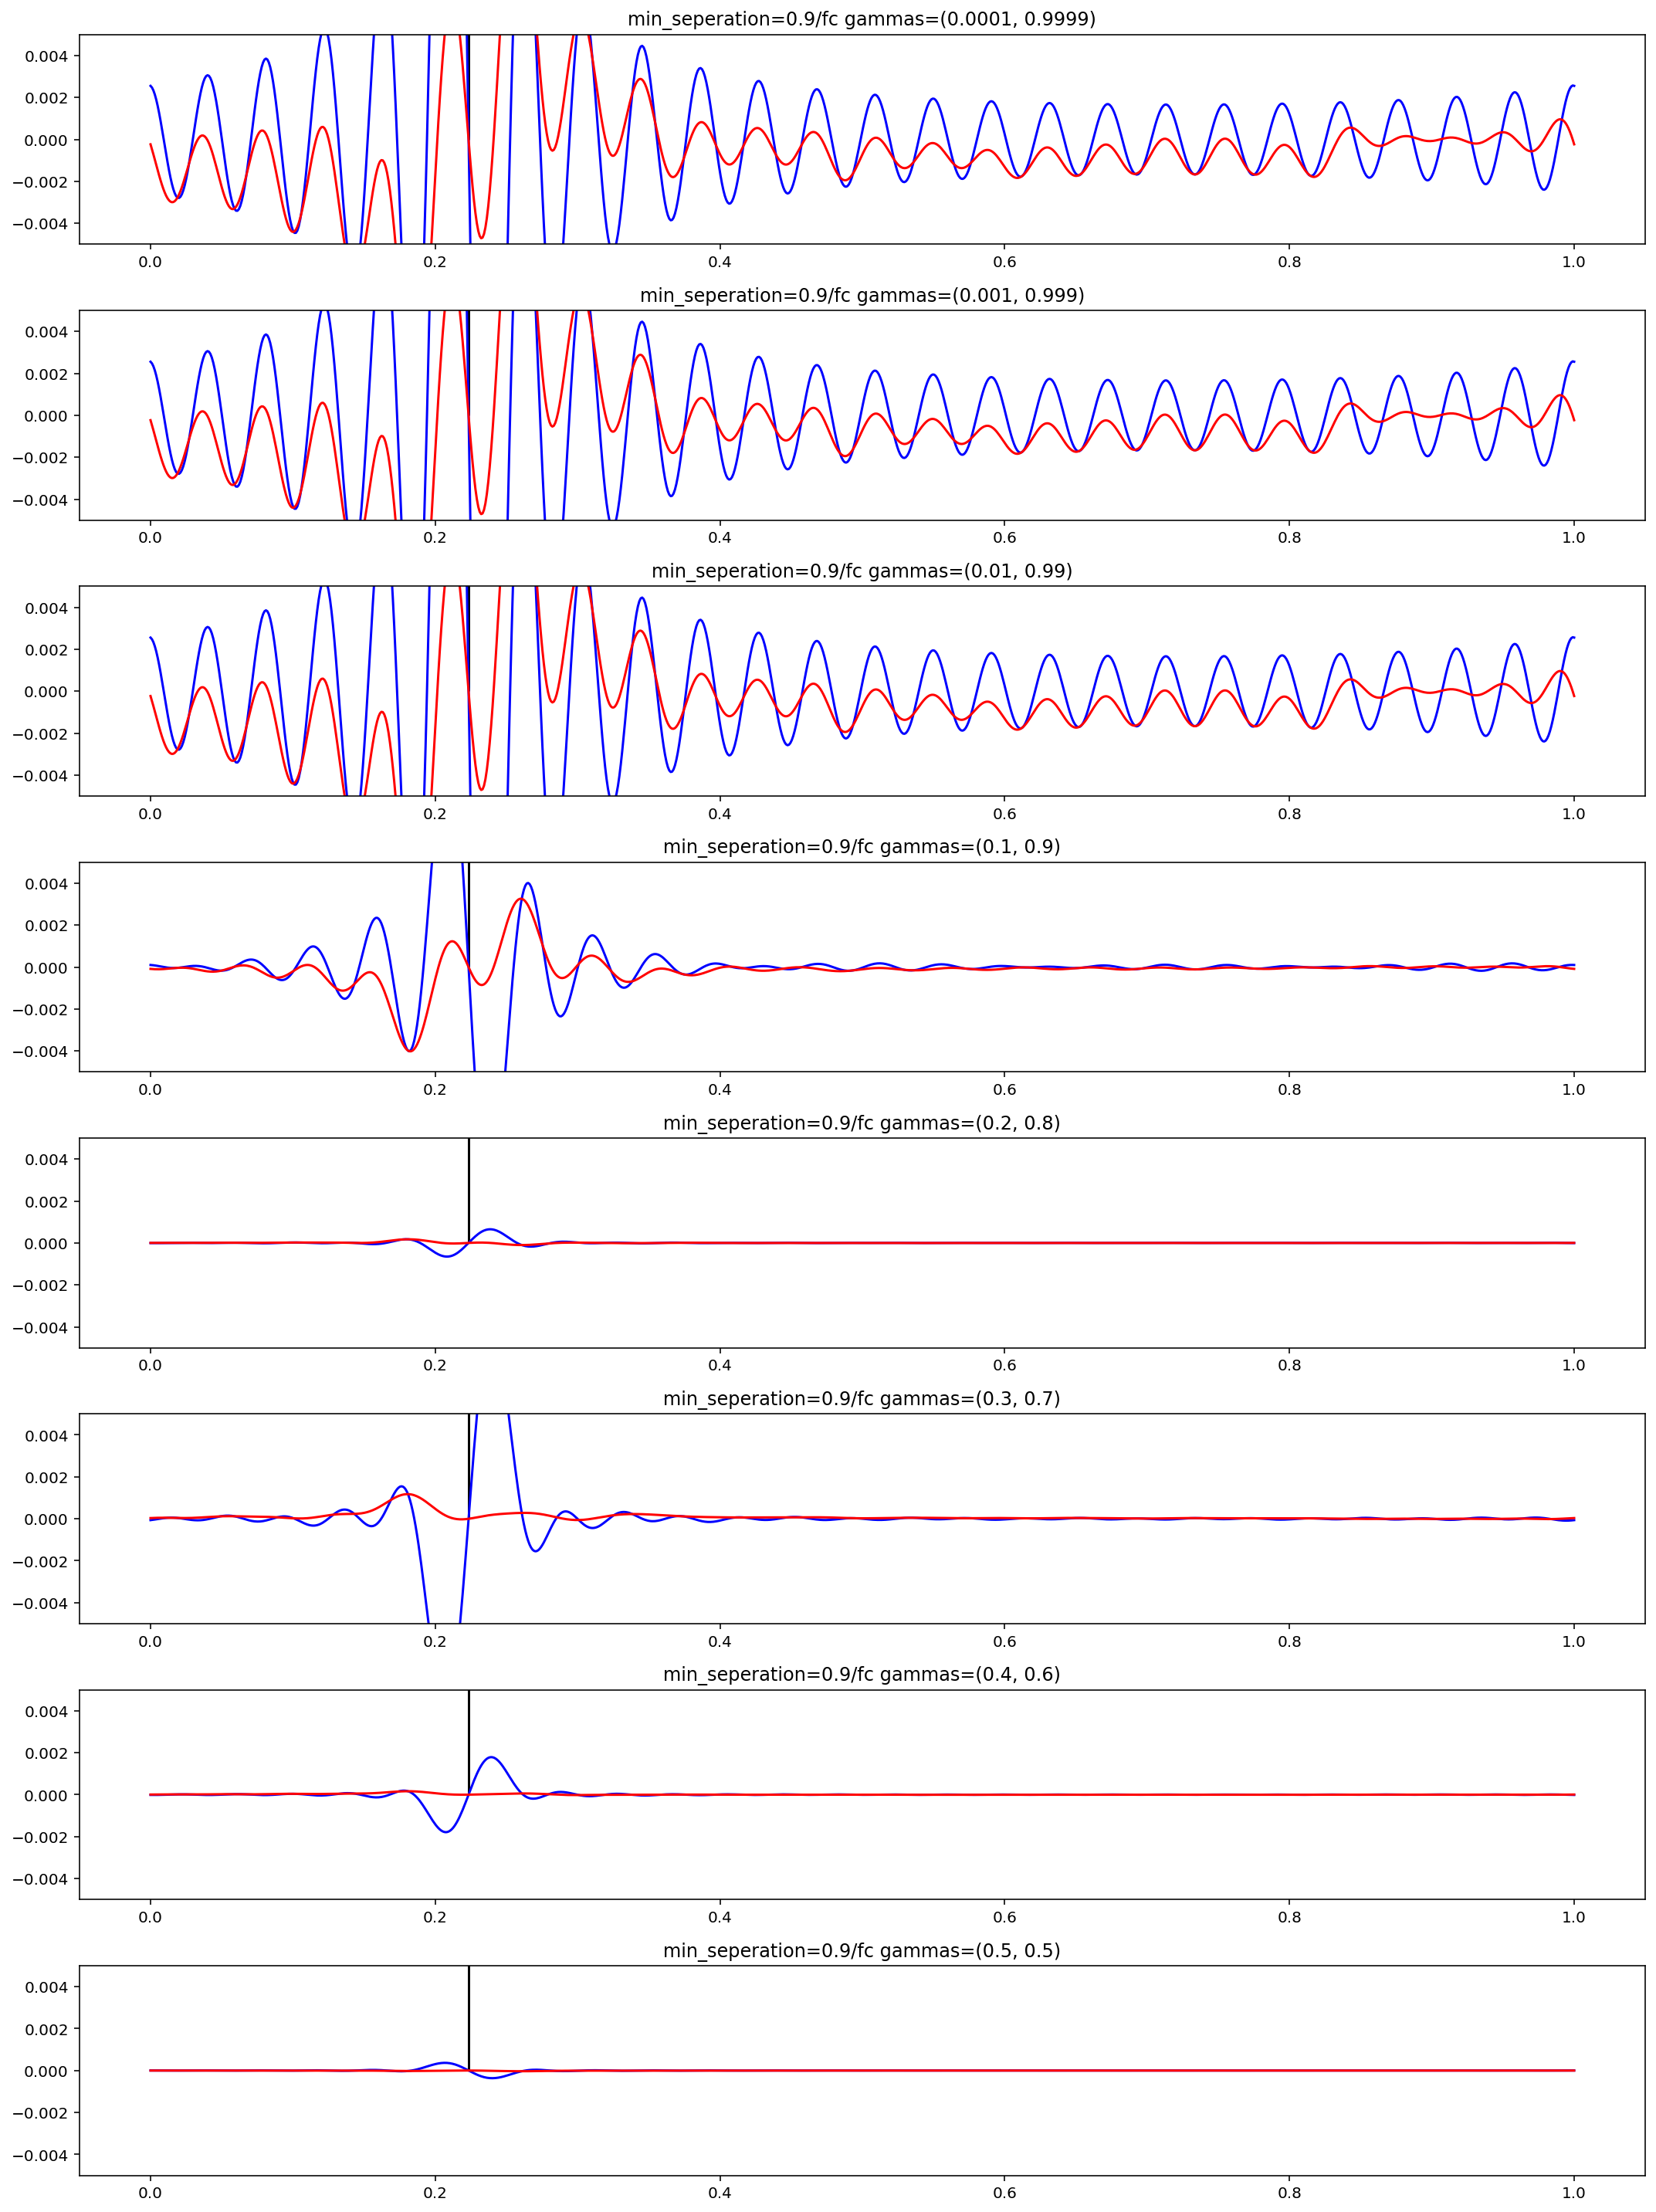

In [122]:
# fc = 25
# seperations = [0.9,0.65,0.5]

fig, axs = plt.subplots(8, 1, figsize=(15, 20))
fig.set_tight_layout(True)

for k in range(len(gammas)):
#     for j,i in enumerate(seperations):
#     min_separation = 0.9 / fc
#     N = int(1.0 / min_separation) - 6
#     support = test_data.jittered_supports(N, min_separation=min_separation, jitter_factor=5, jitter_ratio=1.0)
    kernel = TrigPoly.multi_dirichlet(fc, gammas[k])
    beta = np.diag(np.linalg.solve(K0, K1)) / np.diag(K2 - np.dot(K1, np.linalg.solve(K0, K1)))

    ts = np.linspace(0, 1, 1000)
    near_second_deriv_bound_values = []
    between_bound_values = []
    two=[]
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)
    K0iK1 = np.linalg.solve(K0, K1)
    beta = np.divide(np.diag(K0iK1), (np.diag(K2) - np.diag(np.matmul(K1, K0iK1))))
    d_beta = np.zeros((N, N), float)
    np.fill_diagonal(d_beta, beta)

    for t in ts:
        k0 = kernel_vector(kernel, t, support)
        k1 = kernel_vector(kernel.derivative(), t, support)
#         between_bound_values.append(np.linalg.norm(
# #             np.linalg.solve(K0, k0) + 
#             d_beta @ k1,2))
                                    
#         two.append(np.linalg.norm(d_beta@np.matmul(K1, np.linalg.solve(K0, k0)), 2))
        between_bound_values.append((d_beta @ k1)[5])
        two.append((d_beta@np.matmul(K1, np.linalg.solve(K0, k0)))[5])
#                 (np.linalg.solve(K0, k0) + 
#                  (d_beta @ (k1 - np.matmul(K1, np.linalg.solve(K0, k0))))[5])
    axs.flatten()[k].plot(ts,between_bound_values, color="blue")
    axs.flatten()[k].set_title(f"min_seperation=0.9/fc gammas={gammas[k]}")
#     axs.flatten()[k].plot(ts,np.repeat(0,len(between_bound_values)),color="red")
    axs.flatten()[k].plot(ts,two,color="red")
    axs.flatten()[k].set_ylim([-0.005,0.005])
    axs.flatten()[k].vlines(support[5], 0, 1)

## Plot of $l_2$ norm of $q(t)$  for different double dirichlet kernels and minimum separation of 0.9.

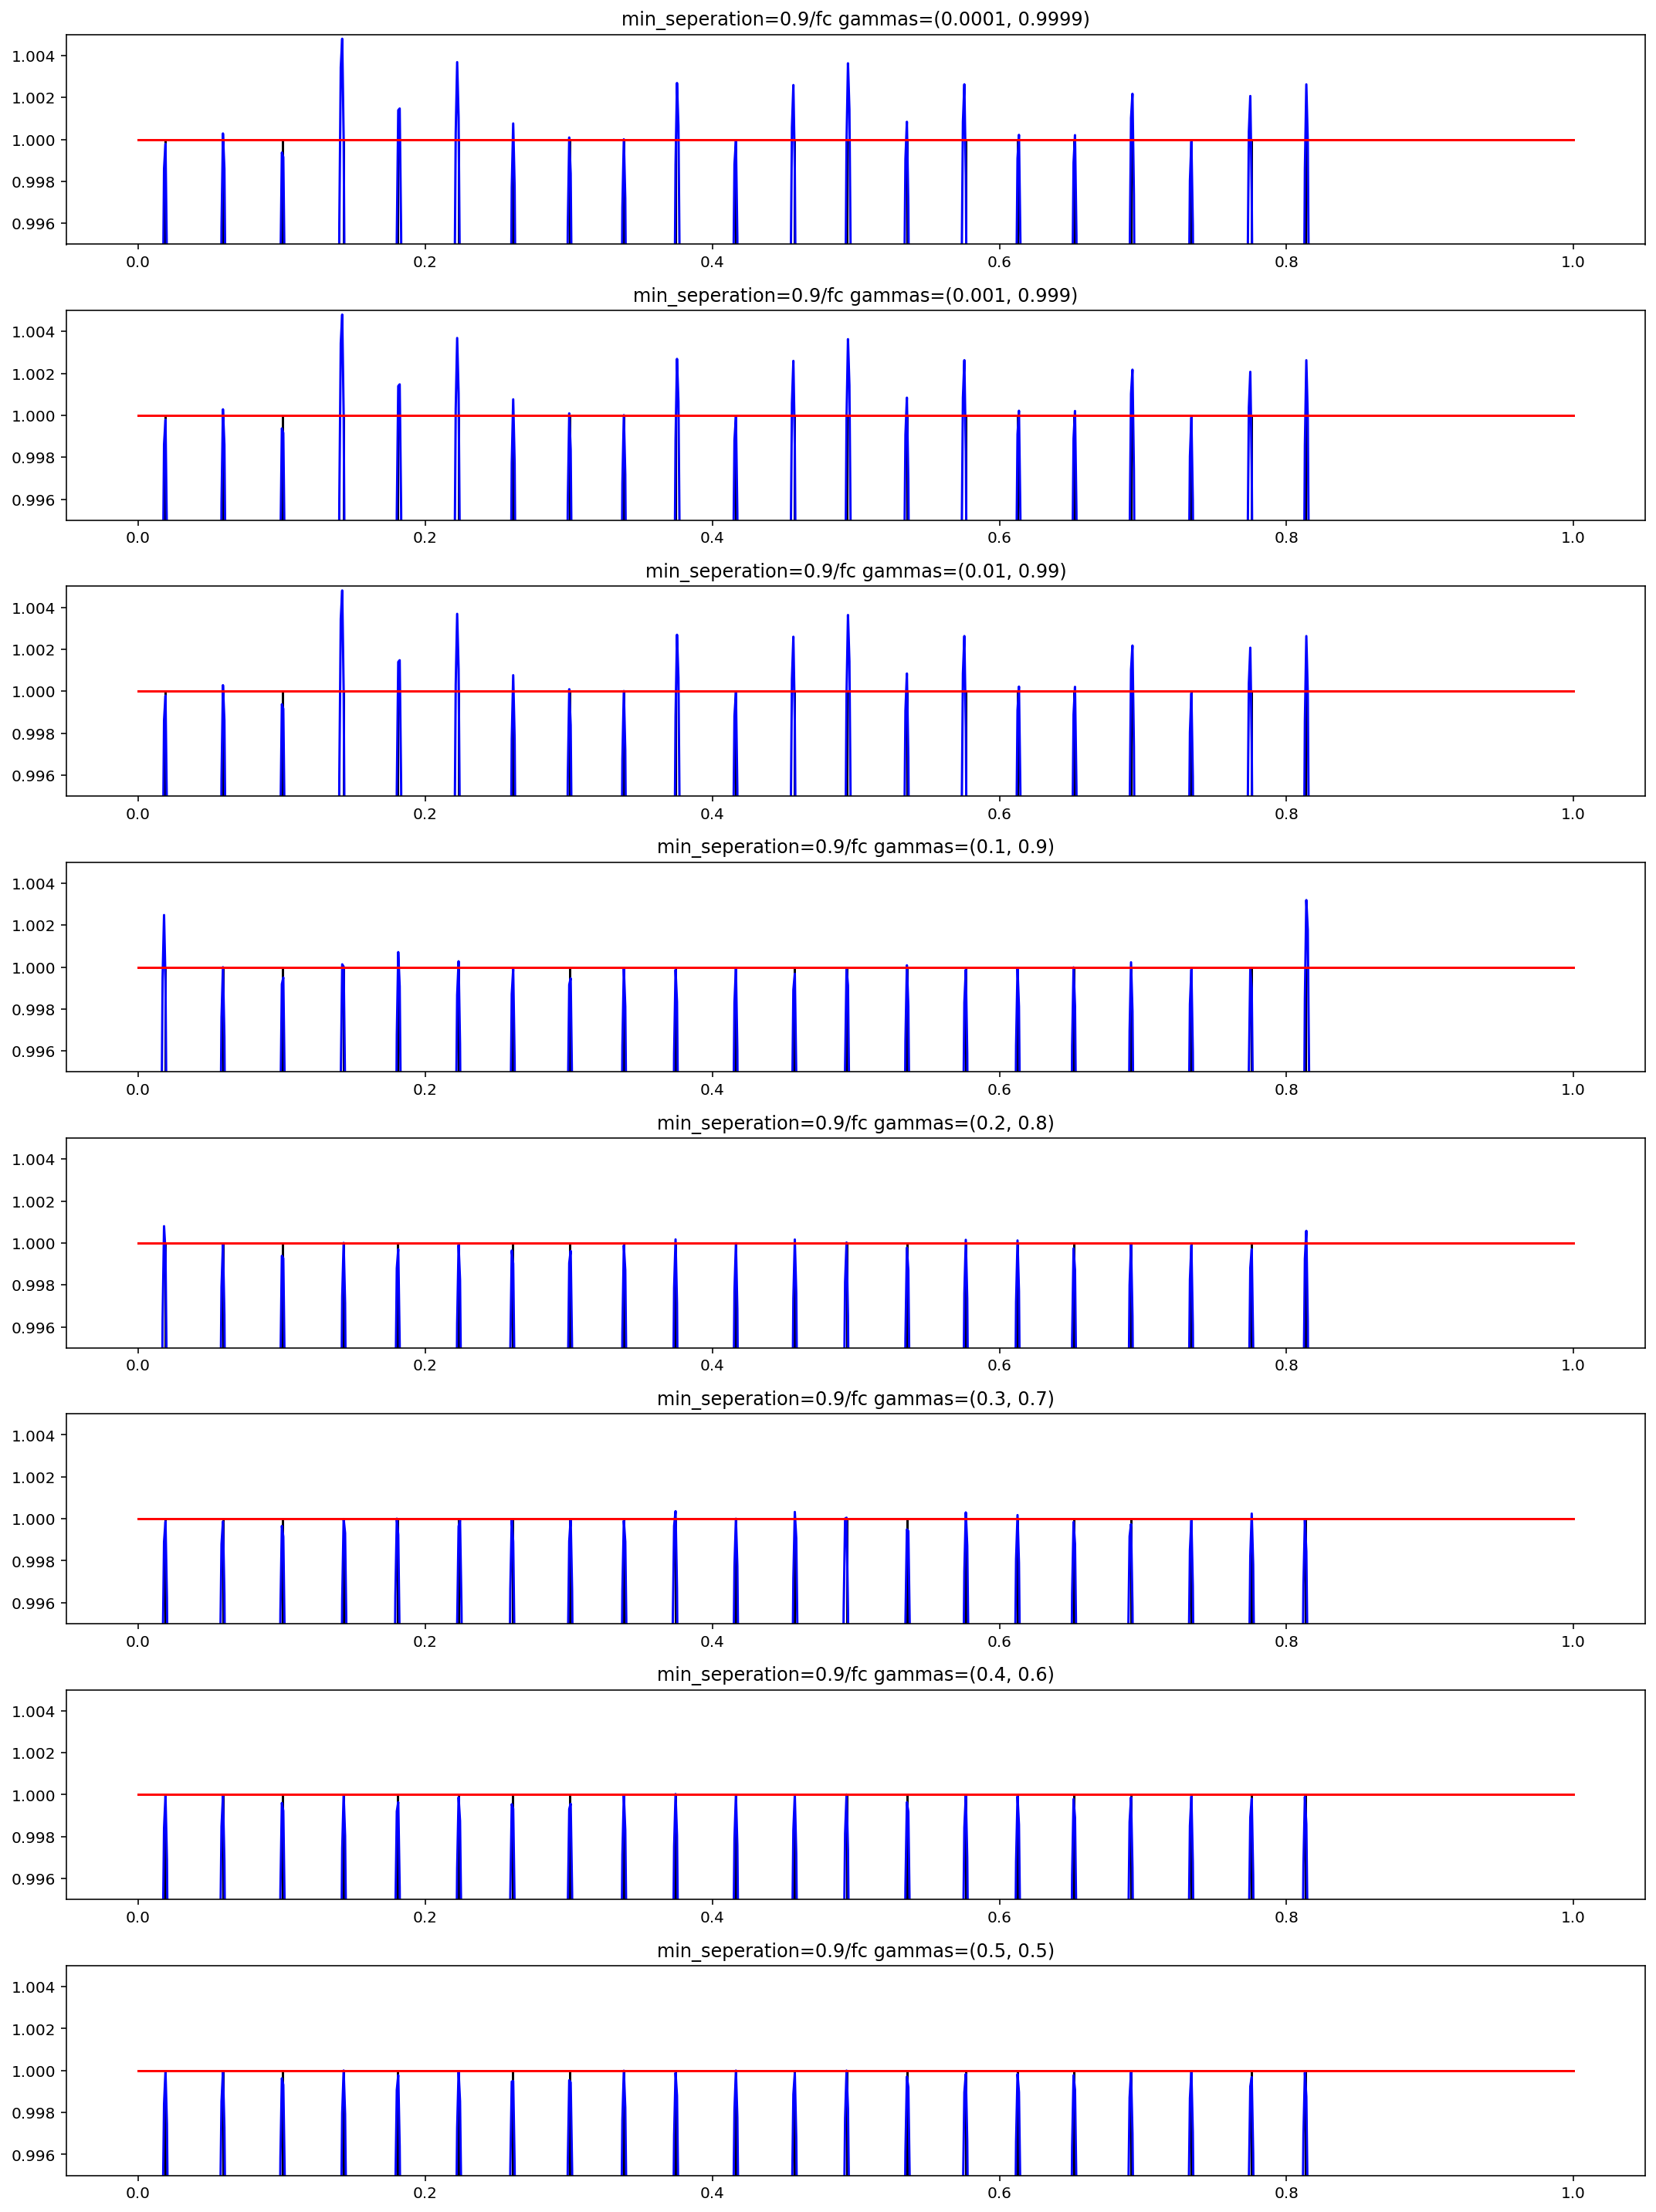

In [123]:
fig, axs = plt.subplots(8, 1, figsize=(15, 20))
fig.set_tight_layout(True)

for k in range(len(gammas)):
#     for j,i in enumerate(seperations):
#     min_separation = 0.9 / fc
#     N = int(1.0 / min_separation) - 6
#     support = test_data.jittered_supports(N, min_separation=min_separation, jitter_factor=5, jitter_ratio=1.0)
    kernel = TrigPoly.multi_dirichlet(fc, gammas[k])
    beta = np.diag(np.linalg.solve(K0, K1)) / np.diag(K2 - np.dot(K1, np.linalg.solve(K0, K1)))

    ts = np.linspace(0, 1, 1000)
    near_second_deriv_bound_values = []
    between_bound_values = []
#     two=[]
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)
    K0iK1 = np.linalg.solve(K0, K1)
    beta = np.divide(np.diag(K0iK1), (np.diag(K2) - np.diag(np.matmul(K1, K0iK1))))
    d_beta = np.zeros((N, N), float)
    np.fill_diagonal(d_beta, beta)

    for t in ts:
        k0 = kernel_vector(kernel, t, support)
        k1 = kernel_vector(kernel.derivative(), t, support)
        between_bound_values.append(np.linalg.norm(
            np.linalg.solve(K0, k0) + 
            d_beta @ (k1 - np.matmul(K1, np.linalg.solve(K0, k0))),2))
                                    
#         two.append(np.linalg.norm(d_beta@np.matmul(K1, np.linalg.solve(K0, k0)), 2))
#         between_bound_values.append
#                 (np.linalg.solve(K0, k0) + 
#                  (d_beta @ (k1 - np.matmul(K1, np.linalg.solve(K0, k0)))))
    axs.flatten()[k].plot(ts,between_bound_values, color="blue")
    axs.flatten()[k].set_title(f"min_seperation=0.9/fc gammas={gammas[k]}")
    axs.flatten()[k].plot(ts,np.repeat(1,len(between_bound_values)),color="red")
#     axs.flatten()[k].plot(ts,two,color="red")
    axs.flatten()[k].set_ylim([0.995,1.005])
    axs.flatten()[k].vlines(support, 0, 1)